# Project 1 TAA

## Expression Recognition with Keras

### Load datasets from file

In [190]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to load matlab mat files
from scipy.io import loadmat
# for neural network
import tensorflow as tf
from tensorflow import keras

In [191]:
labelNames = ["happy", "sad"]

# Load Training data
mat=loadmat(f"../datasets/train/{'_'.join(labelNames)}.mat")
# mat is a dict with key "X" for x-values, and key "y" for y values
X, y = mat["X"], mat["y"]

# Load Dev Data
matDev=loadmat(f"../datasets/dev/{'_'.join(labelNames)}.mat")
X_valid, y_valid = matDev["X"], matDev["y"]

# Load Test Data
matTest=loadmat(f"../datasets/test/{'_'.join(labelNames)}.mat")
X_test, y_test = matTest["X"], matTest["y"]

In [192]:
# numbers
m = X.shape[0] # number of training examples
labels = np.max(y)+1 # number of labels
features = X.shape[1] # number of features per example

print(f"Loaded {m} traing examples with {labels} labels, each with {features} features (pixels).")
print("Labels are:", ', '.join(labelNames))

print(f"Loaded {X_valid.shape[0]} dev examples.")
print(f"Loaded {X_test.shape[0]} test examples.")

Loaded 2000 traing examples with 2 labels, each with 2304 features (pixels).
Labels are: happy, sad
Loaded 400 dev examples.
Loaded 400 test examples.


### Some examples

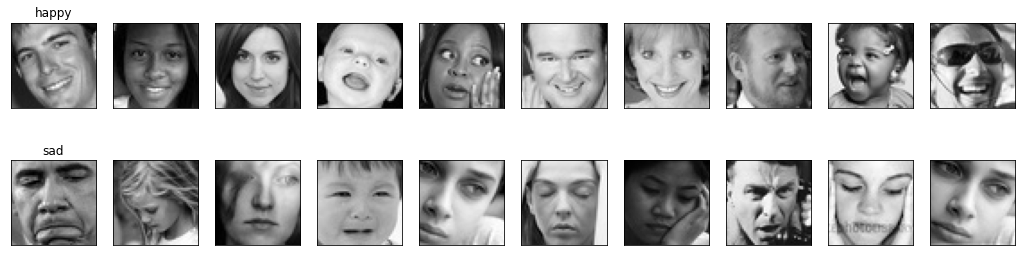

In [193]:
examplesNumber = 10
fig, axis = plt.subplots(labels,examplesNumber,figsize=(18,2*labels))
fig.subplots_adjust(top=1)

# Foreach label, output 10 random images
for i in range(labels):
    for j in range(examplesNumber):
        # Show image
        axis[i,j].imshow(X[np.random.randint((m/labels)*(i),(m/labels)*(i+1)+1),:].reshape(48,48,order="F").T, cmap="gray") 
        # Hide axes
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])
        # Display title only on first
        if j==0:
            axis[i,j].set_title(labelNames[i])

### The neural network

Based on https://medium.com/nerd-for-tech/how-to-train-neural-networks-for-image-classification-part-1-21327fe1cc1

In [194]:
# Important variables
iterations = 5000
hiddenLayers = [300,200,100,50]

#### Build the network

In [195]:
# Create model
modelSeq = []
# Flattens each image (48x48) to 1x2304
modelSeq.append(keras.layers.Flatten(input_shape = [48, 48]))
# Hidden layers with relu activation function
for h in hiddenLayers:
    modelSeq.append(keras.layers.Dense(h, activation = "relu" ))
# Output layer with softmax activation function
modelSeq.append(keras.layers.Dense(labels, activation = "softmax" ))

model = keras.models.Sequential(modelSeq)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               691500    
_________________________________________________________________
dense_6 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 102       
Total params: 776,952
Trainable params: 776,952
Non-trainable params: 0
________________________________________________

In [196]:
# Compile model

model.compile(
    # Using sparse categorical crossentropy loss function
    loss = "sparse_categorical_crossentropy",
    # Using stochastic gradient descent as gradient descent
    optimizer = "sgd",
    # In addition to cost, we want accuracy to help understanding how the model is working 
    metrics = ["accuracy"]
)

#### Train the network

In [197]:
history = model.fit(
    X,
    y,
    epochs = iterations,
    # batch_size = iteratios/10,
    validation_data = (X_valid, y_valid)
)

Epoch 1/5000
63/63 [==============================] - 1s 7ms/step - loss: 0.6925 - accuracy: 0.5370 - val_loss: 0.6754 - val_accuracy: 0.5700
Epoch 2/5000
63/63 [==============================] - 0s 3ms/step - loss: 0.6625 - accuracy: 0.6237 - val_loss: 0.7033 - val_accuracy: 0.5200
Epoch 3/5000
63/63 [==============================] - 0s 4ms/step - loss: 0.6633 - accuracy: 0.6109 - val_loss: 0.6618 - val_accuracy: 0.5725
Epoch 4/5000
63/63 [==============================] - 0s 3ms/step - loss: 0.6548 - accuracy: 0.6188 - val_loss: 0.7411 - val_accuracy: 0.5350
Epoch 5/5000
63/63 [==============================] - 0s 3ms/step - loss: 0.6419 - accuracy: 0.6229 - val_loss: 0.6283 - val_accuracy: 0.6425
Epoch 6/5000
63/63 [==============================] - 0s 4ms/step - loss: 0.6352 - accuracy: 0.6284 - val_loss: 0.6199 - val_accuracy: 0.6375
Epoch 7/5000
63/63 [==============================] - 0s 4ms/step - loss: 0.6070 - accuracy: 0.6858 - val_loss: 0.6021 - val_accuracy: 0.7150
Epoch 

63/63 [==============================] - 0s 4ms/step - loss: 0.3197 - accuracy: 0.8678 - val_loss: 0.7188 - val_accuracy: 0.7075
Epoch 52/5000
63/63 [==============================] - 0s 4ms/step - loss: 0.4387 - accuracy: 0.7812 - val_loss: 0.6088 - val_accuracy: 0.6950
Epoch 53/5000
63/63 [==============================] - 0s 4ms/step - loss: 0.3584 - accuracy: 0.8418 - val_loss: 0.7641 - val_accuracy: 0.6275
Epoch 54/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.3238 - accuracy: 0.8677 - val_loss: 0.6014 - val_accuracy: 0.7150
Epoch 55/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.3212 - accuracy: 0.8592 - val_loss: 0.7194 - val_accuracy: 0.6450
Epoch 56/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.3564 - accuracy: 0.8393 - val_loss: 0.6757 - val_accuracy: 0.6625
Epoch 57/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.3122 - accuracy: 0.8682 - val_loss: 0.7498 - val_accuracy: 0.6425
Epoch 58/5000

63/63 [==============================] - 0s 5ms/step - loss: 0.0926 - accuracy: 0.9682 - val_loss: 0.9929 - val_accuracy: 0.7350
Epoch 109/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.0449 - accuracy: 0.9923 - val_loss: 1.3410 - val_accuracy: 0.6825
Epoch 110/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.4038 - accuracy: 0.8322 - val_loss: 1.0620 - val_accuracy: 0.6700
Epoch 111/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0840 - accuracy: 0.9752 - val_loss: 0.8783 - val_accuracy: 0.6875
Epoch 112/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.0577 - accuracy: 0.9824 - val_loss: 1.0512 - val_accuracy: 0.7175
Epoch 113/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.0486 - accuracy: 0.9919 - val_loss: 0.9956 - val_accuracy: 0.7075
Epoch 114/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.1922 - accuracy: 0.9456 - val_loss: 0.9761 - val_accuracy: 0.6475
Epoch 1

Epoch 165/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.3478 - val_accuracy: 0.7025
Epoch 166/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.3564 - val_accuracy: 0.7025
Epoch 167/5000
63/63 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.3626 - val_accuracy: 0.7075
Epoch 168/5000
63/63 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.3673 - val_accuracy: 0.7000
Epoch 169/5000
63/63 [==============================] - 0s 5ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.3643 - val_accuracy: 0.7050
Epoch 170/5000
63/63 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.3832 - val_accuracy: 0.6925
Epoch 171/5000
63/63 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.3780 - val_accuracy:

63/63 [==============================] - 0s 7ms/step - loss: 6.7668e-04 - accuracy: 1.0000 - val_loss: 1.5165 - val_accuracy: 0.7000
Epoch 222/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.2715e-04 - accuracy: 1.0000 - val_loss: 1.5175 - val_accuracy: 0.7000
Epoch 223/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.3290e-04 - accuracy: 1.0000 - val_loss: 1.5214 - val_accuracy: 0.7025
Epoch 224/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.4573e-04 - accuracy: 1.0000 - val_loss: 1.5260 - val_accuracy: 0.7000
Epoch 225/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.0431e-04 - accuracy: 1.0000 - val_loss: 1.5252 - val_accuracy: 0.7025
Epoch 226/5000
63/63 [==============================] - 0s 5ms/step - loss: 5.5509e-04 - accuracy: 1.0000 - val_loss: 1.5271 - val_accuracy: 0.7000
Epoch 227/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.0432e-04 - accuracy: 1.0000 - val_loss: 1.5309 - 

63/63 [==============================] - 0s 5ms/step - loss: 3.5738e-04 - accuracy: 1.0000 - val_loss: 1.6033 - val_accuracy: 0.6975
Epoch 277/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.9139e-04 - accuracy: 1.0000 - val_loss: 1.6059 - val_accuracy: 0.6925
Epoch 278/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.8847e-04 - accuracy: 1.0000 - val_loss: 1.6068 - val_accuracy: 0.6950
Epoch 279/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.6725e-04 - accuracy: 1.0000 - val_loss: 1.6091 - val_accuracy: 0.6925
Epoch 280/5000
63/63 [==============================] - 0s 4ms/step - loss: 3.4720e-04 - accuracy: 1.0000 - val_loss: 1.6093 - val_accuracy: 0.6925
Epoch 281/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.5941e-04 - accuracy: 1.0000 - val_loss: 1.6126 - val_accuracy: 0.6925
Epoch 282/5000
63/63 [==============================] - 0s 4ms/step - loss: 3.5263e-04 - accuracy: 1.0000 - val_loss: 1.6107 - 

63/63 [==============================] - 0s 6ms/step - loss: 2.6802e-04 - accuracy: 1.0000 - val_loss: 1.6645 - val_accuracy: 0.6950
Epoch 332/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.6331e-04 - accuracy: 1.0000 - val_loss: 1.6650 - val_accuracy: 0.7000
Epoch 333/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.2808e-04 - accuracy: 1.0000 - val_loss: 1.6693 - val_accuracy: 0.6925
Epoch 334/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.5488e-04 - accuracy: 1.0000 - val_loss: 1.6674 - val_accuracy: 0.7000
Epoch 335/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.4127e-04 - accuracy: 1.0000 - val_loss: 1.6689 - val_accuracy: 0.6950
Epoch 336/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.2832e-04 - accuracy: 1.0000 - val_loss: 1.6691 - val_accuracy: 0.7000
Epoch 337/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.6131e-04 - accuracy: 1.0000 - val_loss: 1.6727 - 

63/63 [==============================] - 0s 5ms/step - loss: 1.9956e-04 - accuracy: 1.0000 - val_loss: 1.7142 - val_accuracy: 0.6950
Epoch 387/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.9157e-04 - accuracy: 1.0000 - val_loss: 1.7144 - val_accuracy: 0.6975
Epoch 388/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.8932e-04 - accuracy: 1.0000 - val_loss: 1.7169 - val_accuracy: 0.6925
Epoch 389/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.8924e-04 - accuracy: 1.0000 - val_loss: 1.7152 - val_accuracy: 0.7000
Epoch 390/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.9681e-04 - accuracy: 1.0000 - val_loss: 1.7162 - val_accuracy: 0.6950
Epoch 391/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.8501e-04 - accuracy: 1.0000 - val_loss: 1.7166 - val_accuracy: 0.7000
Epoch 392/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.1062e-04 - accuracy: 1.0000 - val_loss: 1.7180 - 

63/63 [==============================] - 0s 5ms/step - loss: 1.5597e-04 - accuracy: 1.0000 - val_loss: 1.7526 - val_accuracy: 0.6975
Epoch 442/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.4940e-04 - accuracy: 1.0000 - val_loss: 1.7535 - val_accuracy: 0.6950
Epoch 443/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.6034e-04 - accuracy: 1.0000 - val_loss: 1.7536 - val_accuracy: 0.6950
Epoch 444/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.5601e-04 - accuracy: 1.0000 - val_loss: 1.7535 - val_accuracy: 0.7000
Epoch 445/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.5369e-04 - accuracy: 1.0000 - val_loss: 1.7542 - val_accuracy: 0.7000
Epoch 446/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.5754e-04 - accuracy: 1.0000 - val_loss: 1.7544 - val_accuracy: 0.7000
Epoch 447/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.5013e-04 - accuracy: 1.0000 - val_loss: 1.7563 - 

63/63 [==============================] - 0s 4ms/step - loss: 1.3502e-04 - accuracy: 1.0000 - val_loss: 1.7843 - val_accuracy: 0.7000
Epoch 497/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.2812e-04 - accuracy: 1.0000 - val_loss: 1.7852 - val_accuracy: 0.6950
Epoch 498/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.3310e-04 - accuracy: 1.0000 - val_loss: 1.7859 - val_accuracy: 0.7000
Epoch 499/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.2684e-04 - accuracy: 1.0000 - val_loss: 1.7858 - val_accuracy: 0.7000
Epoch 500/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.3141e-04 - accuracy: 1.0000 - val_loss: 1.7869 - val_accuracy: 0.7000
Epoch 501/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.2952e-04 - accuracy: 1.0000 - val_loss: 1.7875 - val_accuracy: 0.7000
Epoch 502/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.2920e-04 - accuracy: 1.0000 - val_loss: 1.7883 - 

63/63 [==============================] - 0s 5ms/step - loss: 1.0959e-04 - accuracy: 1.0000 - val_loss: 1.8141 - val_accuracy: 0.6975
Epoch 552/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.0965e-04 - accuracy: 1.0000 - val_loss: 1.8129 - val_accuracy: 0.7025
Epoch 553/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.2253e-04 - accuracy: 1.0000 - val_loss: 1.8140 - val_accuracy: 0.7000
Epoch 554/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.1710e-04 - accuracy: 1.0000 - val_loss: 1.8146 - val_accuracy: 0.7000
Epoch 555/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.1180e-04 - accuracy: 1.0000 - val_loss: 1.8154 - val_accuracy: 0.6975
Epoch 556/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.0524e-04 - accuracy: 1.0000 - val_loss: 1.8158 - val_accuracy: 0.7000
Epoch 557/5000
63/63 [==============================] - 0s 4ms/step - loss: 9.8315e-05 - accuracy: 1.0000 - val_loss: 1.8154 - 

63/63 [==============================] - 0s 4ms/step - loss: 9.2196e-05 - accuracy: 1.0000 - val_loss: 1.8385 - val_accuracy: 0.7000
Epoch 607/5000
63/63 [==============================] - 0s 4ms/step - loss: 9.3407e-05 - accuracy: 1.0000 - val_loss: 1.8386 - val_accuracy: 0.7000
Epoch 608/5000
63/63 [==============================] - 0s 4ms/step - loss: 9.3668e-05 - accuracy: 1.0000 - val_loss: 1.8394 - val_accuracy: 0.7000
Epoch 609/5000
63/63 [==============================] - 0s 5ms/step - loss: 9.4071e-05 - accuracy: 1.0000 - val_loss: 1.8397 - val_accuracy: 0.7000
Epoch 610/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.0141e-04 - accuracy: 1.0000 - val_loss: 1.8402 - val_accuracy: 0.6975
Epoch 611/5000
63/63 [==============================] - 0s 4ms/step - loss: 9.5336e-05 - accuracy: 1.0000 - val_loss: 1.8404 - val_accuracy: 0.7000
Epoch 612/5000
63/63 [==============================] - 0s 4ms/step - loss: 9.6655e-05 - accuracy: 1.0000 - val_loss: 1.8410 - 

63/63 [==============================] - 0s 6ms/step - loss: 7.7894e-05 - accuracy: 1.0000 - val_loss: 1.8619 - val_accuracy: 0.6975
Epoch 662/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.8427e-05 - accuracy: 1.0000 - val_loss: 1.8614 - val_accuracy: 0.6975
Epoch 663/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.7148e-05 - accuracy: 1.0000 - val_loss: 1.8624 - val_accuracy: 0.6975
Epoch 664/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.2354e-05 - accuracy: 1.0000 - val_loss: 1.8623 - val_accuracy: 0.6975
Epoch 665/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.8422e-05 - accuracy: 1.0000 - val_loss: 1.8625 - val_accuracy: 0.6975
Epoch 666/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.7707e-05 - accuracy: 1.0000 - val_loss: 1.8629 - val_accuracy: 0.6975
Epoch 667/5000
63/63 [==============================] - 0s 4ms/step - loss: 8.4242e-05 - accuracy: 1.0000 - val_loss: 1.8631 - 

63/63 [==============================] - 0s 5ms/step - loss: 7.9686e-05 - accuracy: 1.0000 - val_loss: 1.8803 - val_accuracy: 0.6975
Epoch 717/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.1784e-05 - accuracy: 1.0000 - val_loss: 1.8807 - val_accuracy: 0.6975
Epoch 718/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.5906e-05 - accuracy: 1.0000 - val_loss: 1.8810 - val_accuracy: 0.6975
Epoch 719/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.0745e-05 - accuracy: 1.0000 - val_loss: 1.8811 - val_accuracy: 0.6975
Epoch 720/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.6881e-05 - accuracy: 1.0000 - val_loss: 1.8816 - val_accuracy: 0.6975
Epoch 721/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.9300e-05 - accuracy: 1.0000 - val_loss: 1.8817 - val_accuracy: 0.6975
Epoch 722/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.3379e-05 - accuracy: 1.0000 - val_loss: 1.8829 - 

63/63 [==============================] - 0s 5ms/step - loss: 7.4283e-05 - accuracy: 1.0000 - val_loss: 1.8990 - val_accuracy: 0.6975
Epoch 772/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.8593e-05 - accuracy: 1.0000 - val_loss: 1.8989 - val_accuracy: 0.6975
Epoch 773/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.6798e-05 - accuracy: 1.0000 - val_loss: 1.8995 - val_accuracy: 0.6975
Epoch 774/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.4162e-05 - accuracy: 1.0000 - val_loss: 1.8998 - val_accuracy: 0.6975
Epoch 775/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.0018e-05 - accuracy: 1.0000 - val_loss: 1.9004 - val_accuracy: 0.6975
Epoch 776/5000
63/63 [==============================] - 0s 7ms/step - loss: 6.4044e-05 - accuracy: 1.0000 - val_loss: 1.9000 - val_accuracy: 0.6975
Epoch 777/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.5396e-05 - accuracy: 1.0000 - val_loss: 1.9005 - 

63/63 [==============================] - 0s 5ms/step - loss: 5.9048e-05 - accuracy: 1.0000 - val_loss: 1.9156 - val_accuracy: 0.6975
Epoch 827/5000
63/63 [==============================] - 0s 5ms/step - loss: 5.4069e-05 - accuracy: 1.0000 - val_loss: 1.9159 - val_accuracy: 0.6975
Epoch 828/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.2090e-05 - accuracy: 1.0000 - val_loss: 1.9160 - val_accuracy: 0.6975
Epoch 829/5000
63/63 [==============================] - 0s 5ms/step - loss: 5.9599e-05 - accuracy: 1.0000 - val_loss: 1.9161 - val_accuracy: 0.6975
Epoch 830/5000
63/63 [==============================] - 0s 4ms/step - loss: 6.7196e-05 - accuracy: 1.0000 - val_loss: 1.9167 - val_accuracy: 0.6975
Epoch 831/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.2215e-05 - accuracy: 1.0000 - val_loss: 1.9170 - val_accuracy: 0.6975
Epoch 832/5000
63/63 [==============================] - 0s 5ms/step - loss: 5.7878e-05 - accuracy: 1.0000 - val_loss: 1.9175 - 

63/63 [==============================] - 0s 5ms/step - loss: 5.6327e-05 - accuracy: 1.0000 - val_loss: 1.9313 - val_accuracy: 0.6975
Epoch 882/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.1413e-05 - accuracy: 1.0000 - val_loss: 1.9314 - val_accuracy: 0.6975
Epoch 883/5000
63/63 [==============================] - 0s 6ms/step - loss: 5.9438e-05 - accuracy: 1.0000 - val_loss: 1.9318 - val_accuracy: 0.6975
Epoch 884/5000
63/63 [==============================] - 0s 5ms/step - loss: 5.1331e-05 - accuracy: 1.0000 - val_loss: 1.9313 - val_accuracy: 0.6975
Epoch 885/5000
63/63 [==============================] - 0s 5ms/step - loss: 5.2837e-05 - accuracy: 1.0000 - val_loss: 1.9321 - val_accuracy: 0.6975
Epoch 886/5000
63/63 [==============================] - 0s 5ms/step - loss: 5.1486e-05 - accuracy: 1.0000 - val_loss: 1.9322 - val_accuracy: 0.6975
Epoch 887/5000
63/63 [==============================] - 0s 5ms/step - loss: 5.4213e-05 - accuracy: 1.0000 - val_loss: 1.9325 - 

63/63 [==============================] - 0s 5ms/step - loss: 4.7800e-05 - accuracy: 1.0000 - val_loss: 1.9455 - val_accuracy: 0.6975
Epoch 937/5000
63/63 [==============================] - 0s 5ms/step - loss: 4.8814e-05 - accuracy: 1.0000 - val_loss: 1.9459 - val_accuracy: 0.6975
Epoch 938/5000
63/63 [==============================] - 0s 4ms/step - loss: 4.9341e-05 - accuracy: 1.0000 - val_loss: 1.9456 - val_accuracy: 0.6975
Epoch 939/5000
63/63 [==============================] - 0s 5ms/step - loss: 5.0727e-05 - accuracy: 1.0000 - val_loss: 1.9460 - val_accuracy: 0.6975
Epoch 940/5000
63/63 [==============================] - 0s 4ms/step - loss: 4.8629e-05 - accuracy: 1.0000 - val_loss: 1.9465 - val_accuracy: 0.6975
Epoch 941/5000
63/63 [==============================] - 0s 5ms/step - loss: 4.7651e-05 - accuracy: 1.0000 - val_loss: 1.9471 - val_accuracy: 0.6975
Epoch 942/5000
63/63 [==============================] - 0s 4ms/step - loss: 5.2825e-05 - accuracy: 1.0000 - val_loss: 1.9470 - 

63/63 [==============================] - 0s 4ms/step - loss: 4.7319e-05 - accuracy: 1.0000 - val_loss: 1.9587 - val_accuracy: 0.6975
Epoch 992/5000
63/63 [==============================] - 0s 5ms/step - loss: 4.8678e-05 - accuracy: 1.0000 - val_loss: 1.9593 - val_accuracy: 0.6975
Epoch 993/5000
63/63 [==============================] - 0s 5ms/step - loss: 5.0289e-05 - accuracy: 1.0000 - val_loss: 1.9592 - val_accuracy: 0.6975
Epoch 994/5000
63/63 [==============================] - 0s 5ms/step - loss: 4.7202e-05 - accuracy: 1.0000 - val_loss: 1.9600 - val_accuracy: 0.6975
Epoch 995/5000
63/63 [==============================] - 0s 5ms/step - loss: 4.8049e-05 - accuracy: 1.0000 - val_loss: 1.9598 - val_accuracy: 0.6975
Epoch 996/5000
63/63 [==============================] - 0s 4ms/step - loss: 4.3978e-05 - accuracy: 1.0000 - val_loss: 1.9601 - val_accuracy: 0.6975
Epoch 997/5000
63/63 [==============================] - 0s 6ms/step - loss: 5.0559e-05 - accuracy: 1.0000 - val_loss: 1.9602 - 

63/63 [==============================] - 0s 5ms/step - loss: 4.3155e-05 - accuracy: 1.0000 - val_loss: 1.9719 - val_accuracy: 0.6975
Epoch 1047/5000
63/63 [==============================] - 0s 5ms/step - loss: 4.4662e-05 - accuracy: 1.0000 - val_loss: 1.9718 - val_accuracy: 0.6975
Epoch 1048/5000
63/63 [==============================] - 0s 5ms/step - loss: 4.4081e-05 - accuracy: 1.0000 - val_loss: 1.9726 - val_accuracy: 0.6975
Epoch 1049/5000
63/63 [==============================] - 0s 5ms/step - loss: 4.4333e-05 - accuracy: 1.0000 - val_loss: 1.9727 - val_accuracy: 0.6975
Epoch 1050/5000
63/63 [==============================] - 0s 5ms/step - loss: 4.2475e-05 - accuracy: 1.0000 - val_loss: 1.9728 - val_accuracy: 0.6975
Epoch 1051/5000
63/63 [==============================] - 0s 5ms/step - loss: 4.4639e-05 - accuracy: 1.0000 - val_loss: 1.9729 - val_accuracy: 0.6975
Epoch 1052/5000
63/63 [==============================] - 0s 5ms/step - loss: 4.1878e-05 - accuracy: 1.0000 - val_loss: 1.9

63/63 [==============================] - 0s 5ms/step - loss: 4.1258e-05 - accuracy: 1.0000 - val_loss: 1.9835 - val_accuracy: 0.6975
Epoch 1102/5000
63/63 [==============================] - 0s 5ms/step - loss: 4.2194e-05 - accuracy: 1.0000 - val_loss: 1.9837 - val_accuracy: 0.6975
Epoch 1103/5000
63/63 [==============================] - 0s 5ms/step - loss: 4.1614e-05 - accuracy: 1.0000 - val_loss: 1.9841 - val_accuracy: 0.6975
Epoch 1104/5000
63/63 [==============================] - 0s 5ms/step - loss: 4.1157e-05 - accuracy: 1.0000 - val_loss: 1.9842 - val_accuracy: 0.6975
Epoch 1105/5000
63/63 [==============================] - 0s 5ms/step - loss: 4.0099e-05 - accuracy: 1.0000 - val_loss: 1.9848 - val_accuracy: 0.6975
Epoch 1106/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.8908e-05 - accuracy: 1.0000 - val_loss: 1.9849 - val_accuracy: 0.6975
Epoch 1107/5000
63/63 [==============================] - 0s 5ms/step - loss: 4.4061e-05 - accuracy: 1.0000 - val_loss: 1.9

63/63 [==============================] - 0s 5ms/step - loss: 3.9643e-05 - accuracy: 1.0000 - val_loss: 1.9950 - val_accuracy: 0.6975
Epoch 1157/5000
63/63 [==============================] - 0s 5ms/step - loss: 4.0318e-05 - accuracy: 1.0000 - val_loss: 1.9956 - val_accuracy: 0.6975
Epoch 1158/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.8535e-05 - accuracy: 1.0000 - val_loss: 1.9956 - val_accuracy: 0.6975
Epoch 1159/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.8259e-05 - accuracy: 1.0000 - val_loss: 1.9955 - val_accuracy: 0.6975
Epoch 1160/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.7524e-05 - accuracy: 1.0000 - val_loss: 1.9959 - val_accuracy: 0.6975
Epoch 1161/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.7630e-05 - accuracy: 1.0000 - val_loss: 1.9960 - val_accuracy: 0.6975
Epoch 1162/5000
63/63 [==============================] - 0s 5ms/step - loss: 4.3349e-05 - accuracy: 1.0000 - val_loss: 1.9

63/63 [==============================] - 0s 5ms/step - loss: 3.3381e-05 - accuracy: 1.0000 - val_loss: 2.0056 - val_accuracy: 0.6975
Epoch 1212/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.3747e-05 - accuracy: 1.0000 - val_loss: 2.0056 - val_accuracy: 0.6975
Epoch 1213/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.6546e-05 - accuracy: 1.0000 - val_loss: 2.0059 - val_accuracy: 0.6975
Epoch 1214/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.4432e-05 - accuracy: 1.0000 - val_loss: 2.0063 - val_accuracy: 0.6975
Epoch 1215/5000
63/63 [==============================] - 0s 7ms/step - loss: 3.5263e-05 - accuracy: 1.0000 - val_loss: 2.0061 - val_accuracy: 0.6975
Epoch 1216/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.8526e-05 - accuracy: 1.0000 - val_loss: 2.0062 - val_accuracy: 0.6975
Epoch 1217/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.5622e-05 - accuracy: 1.0000 - val_loss: 2.0

63/63 [==============================] - 0s 6ms/step - loss: 3.4420e-05 - accuracy: 1.0000 - val_loss: 2.0155 - val_accuracy: 0.6975
Epoch 1267/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.3469e-05 - accuracy: 1.0000 - val_loss: 2.0159 - val_accuracy: 0.6975
Epoch 1268/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.4318e-05 - accuracy: 1.0000 - val_loss: 2.0157 - val_accuracy: 0.6975
Epoch 1269/5000
63/63 [==============================] - 0s 7ms/step - loss: 3.1543e-05 - accuracy: 1.0000 - val_loss: 2.0159 - val_accuracy: 0.6975
Epoch 1270/5000
63/63 [==============================] - 0s 7ms/step - loss: 3.4913e-05 - accuracy: 1.0000 - val_loss: 2.0161 - val_accuracy: 0.6975
Epoch 1271/5000
63/63 [==============================] - 0s 7ms/step - loss: 3.5241e-05 - accuracy: 1.0000 - val_loss: 2.0164 - val_accuracy: 0.6975
Epoch 1272/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.3745e-05 - accuracy: 1.0000 - val_loss: 2.0

63/63 [==============================] - 0s 5ms/step - loss: 3.3477e-05 - accuracy: 1.0000 - val_loss: 2.0254 - val_accuracy: 0.6975
Epoch 1322/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.2082e-05 - accuracy: 1.0000 - val_loss: 2.0256 - val_accuracy: 0.6975
Epoch 1323/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.8522e-05 - accuracy: 1.0000 - val_loss: 2.0255 - val_accuracy: 0.6975
Epoch 1324/5000
63/63 [==============================] - 0s 4ms/step - loss: 3.5534e-05 - accuracy: 1.0000 - val_loss: 2.0257 - val_accuracy: 0.6975
Epoch 1325/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.3133e-05 - accuracy: 1.0000 - val_loss: 2.0257 - val_accuracy: 0.6975
Epoch 1326/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.3644e-05 - accuracy: 1.0000 - val_loss: 2.0258 - val_accuracy: 0.6975
Epoch 1327/5000
63/63 [==============================] - 0s 4ms/step - loss: 3.0762e-05 - accuracy: 1.0000 - val_loss: 2.0

63/63 [==============================] - 0s 5ms/step - loss: 2.8488e-05 - accuracy: 1.0000 - val_loss: 2.0347 - val_accuracy: 0.6975
Epoch 1377/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.9249e-05 - accuracy: 1.0000 - val_loss: 2.0346 - val_accuracy: 0.6975
Epoch 1378/5000
63/63 [==============================] - 0s 4ms/step - loss: 3.0957e-05 - accuracy: 1.0000 - val_loss: 2.0352 - val_accuracy: 0.6975
Epoch 1379/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.0839e-05 - accuracy: 1.0000 - val_loss: 2.0352 - val_accuracy: 0.6975
Epoch 1380/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.0954e-05 - accuracy: 1.0000 - val_loss: 2.0355 - val_accuracy: 0.6975
Epoch 1381/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.1234e-05 - accuracy: 1.0000 - val_loss: 2.0355 - val_accuracy: 0.6975
Epoch 1382/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.9138e-05 - accuracy: 1.0000 - val_loss: 2.0

63/63 [==============================] - 0s 4ms/step - loss: 2.9107e-05 - accuracy: 1.0000 - val_loss: 2.0434 - val_accuracy: 0.6975
Epoch 1432/5000
63/63 [==============================] - 0s 4ms/step - loss: 2.8229e-05 - accuracy: 1.0000 - val_loss: 2.0437 - val_accuracy: 0.6975
Epoch 1433/5000
63/63 [==============================] - 0s 4ms/step - loss: 3.0411e-05 - accuracy: 1.0000 - val_loss: 2.0436 - val_accuracy: 0.6975
Epoch 1434/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.7341e-05 - accuracy: 1.0000 - val_loss: 2.0438 - val_accuracy: 0.6975
Epoch 1435/5000
63/63 [==============================] - 0s 4ms/step - loss: 3.0189e-05 - accuracy: 1.0000 - val_loss: 2.0439 - val_accuracy: 0.6975
Epoch 1436/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.8457e-05 - accuracy: 1.0000 - val_loss: 2.0443 - val_accuracy: 0.6975
Epoch 1437/5000
63/63 [==============================] - 0s 4ms/step - loss: 2.9523e-05 - accuracy: 1.0000 - val_loss: 2.0

63/63 [==============================] - 0s 5ms/step - loss: 3.1154e-05 - accuracy: 1.0000 - val_loss: 2.0520 - val_accuracy: 0.6975
Epoch 1487/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.7750e-05 - accuracy: 1.0000 - val_loss: 2.0520 - val_accuracy: 0.6975
Epoch 1488/5000
63/63 [==============================] - 0s 4ms/step - loss: 2.6193e-05 - accuracy: 1.0000 - val_loss: 2.0522 - val_accuracy: 0.6975
Epoch 1489/5000
63/63 [==============================] - 0s 5ms/step - loss: 3.0424e-05 - accuracy: 1.0000 - val_loss: 2.0524 - val_accuracy: 0.6975
Epoch 1490/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.7872e-05 - accuracy: 1.0000 - val_loss: 2.0525 - val_accuracy: 0.6975
Epoch 1491/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.8529e-05 - accuracy: 1.0000 - val_loss: 2.0526 - val_accuracy: 0.6975
Epoch 1492/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.7279e-05 - accuracy: 1.0000 - val_loss: 2.0

63/63 [==============================] - 0s 5ms/step - loss: 2.5320e-05 - accuracy: 1.0000 - val_loss: 2.0600 - val_accuracy: 0.6975
Epoch 1542/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.7596e-05 - accuracy: 1.0000 - val_loss: 2.0600 - val_accuracy: 0.6975
Epoch 1543/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.6207e-05 - accuracy: 1.0000 - val_loss: 2.0602 - val_accuracy: 0.6975
Epoch 1544/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.7981e-05 - accuracy: 1.0000 - val_loss: 2.0604 - val_accuracy: 0.6975
Epoch 1545/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.5858e-05 - accuracy: 1.0000 - val_loss: 2.0604 - val_accuracy: 0.6975
Epoch 1546/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.8794e-05 - accuracy: 1.0000 - val_loss: 2.0607 - val_accuracy: 0.6975
Epoch 1547/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.6744e-05 - accuracy: 1.0000 - val_loss: 2.0

63/63 [==============================] - 0s 5ms/step - loss: 2.4289e-05 - accuracy: 1.0000 - val_loss: 2.0679 - val_accuracy: 0.6975
Epoch 1597/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.6659e-05 - accuracy: 1.0000 - val_loss: 2.0680 - val_accuracy: 0.6975
Epoch 1598/5000
63/63 [==============================] - 0s 4ms/step - loss: 2.3755e-05 - accuracy: 1.0000 - val_loss: 2.0682 - val_accuracy: 0.6975
Epoch 1599/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.5328e-05 - accuracy: 1.0000 - val_loss: 2.0682 - val_accuracy: 0.6975
Epoch 1600/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.3071e-05 - accuracy: 1.0000 - val_loss: 2.0683 - val_accuracy: 0.6975
Epoch 1601/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.7867e-05 - accuracy: 1.0000 - val_loss: 2.0684 - val_accuracy: 0.6975
Epoch 1602/5000
63/63 [==============================] - 0s 4ms/step - loss: 2.3838e-05 - accuracy: 1.0000 - val_loss: 2.0

63/63 [==============================] - 0s 5ms/step - loss: 2.6327e-05 - accuracy: 1.0000 - val_loss: 2.0754 - val_accuracy: 0.6975
Epoch 1652/5000
63/63 [==============================] - 0s 4ms/step - loss: 2.6137e-05 - accuracy: 1.0000 - val_loss: 2.0756 - val_accuracy: 0.6975
Epoch 1653/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.3159e-05 - accuracy: 1.0000 - val_loss: 2.0756 - val_accuracy: 0.6975
Epoch 1654/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.3994e-05 - accuracy: 1.0000 - val_loss: 2.0758 - val_accuracy: 0.6975
Epoch 1655/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.5156e-05 - accuracy: 1.0000 - val_loss: 2.0758 - val_accuracy: 0.6975
Epoch 1656/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.6301e-05 - accuracy: 1.0000 - val_loss: 2.0762 - val_accuracy: 0.6975
Epoch 1657/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.2641e-05 - accuracy: 1.0000 - val_loss: 2.0

63/63 [==============================] - 0s 5ms/step - loss: 2.2131e-05 - accuracy: 1.0000 - val_loss: 2.0830 - val_accuracy: 0.6975
Epoch 1707/5000
63/63 [==============================] - 0s 4ms/step - loss: 2.2173e-05 - accuracy: 1.0000 - val_loss: 2.0830 - val_accuracy: 0.6975
Epoch 1708/5000
63/63 [==============================] - 0s 4ms/step - loss: 2.5117e-05 - accuracy: 1.0000 - val_loss: 2.0830 - val_accuracy: 0.6975
Epoch 1709/5000
63/63 [==============================] - 0s 4ms/step - loss: 2.3486e-05 - accuracy: 1.0000 - val_loss: 2.0833 - val_accuracy: 0.6975
Epoch 1710/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.2668e-05 - accuracy: 1.0000 - val_loss: 2.0834 - val_accuracy: 0.6975
Epoch 1711/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.3029e-05 - accuracy: 1.0000 - val_loss: 2.0836 - val_accuracy: 0.6975
Epoch 1712/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.1589e-05 - accuracy: 1.0000 - val_loss: 2.0

63/63 [==============================] - 0s 6ms/step - loss: 2.1108e-05 - accuracy: 1.0000 - val_loss: 2.0901 - val_accuracy: 0.6975
Epoch 1762/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.5434e-05 - accuracy: 1.0000 - val_loss: 2.0902 - val_accuracy: 0.6975
Epoch 1763/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.1650e-05 - accuracy: 1.0000 - val_loss: 2.0903 - val_accuracy: 0.6975
Epoch 1764/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.1479e-05 - accuracy: 1.0000 - val_loss: 2.0905 - val_accuracy: 0.6975
Epoch 1765/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.0981e-05 - accuracy: 1.0000 - val_loss: 2.0907 - val_accuracy: 0.6975
Epoch 1766/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.2290e-05 - accuracy: 1.0000 - val_loss: 2.0910 - val_accuracy: 0.6975
Epoch 1767/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.1118e-05 - accuracy: 1.0000 - val_loss: 2.0

63/63 [==============================] - 0s 5ms/step - loss: 2.0500e-05 - accuracy: 1.0000 - val_loss: 2.0970 - val_accuracy: 0.6975
Epoch 1817/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.4235e-05 - accuracy: 1.0000 - val_loss: 2.0971 - val_accuracy: 0.6975
Epoch 1818/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.9907e-05 - accuracy: 1.0000 - val_loss: 2.0973 - val_accuracy: 0.6975
Epoch 1819/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.0658e-05 - accuracy: 1.0000 - val_loss: 2.0974 - val_accuracy: 0.6975
Epoch 1820/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.0640e-05 - accuracy: 1.0000 - val_loss: 2.0976 - val_accuracy: 0.6975
Epoch 1821/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.0553e-05 - accuracy: 1.0000 - val_loss: 2.0977 - val_accuracy: 0.6975
Epoch 1822/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.2230e-05 - accuracy: 1.0000 - val_loss: 2.0

63/63 [==============================] - 0s 4ms/step - loss: 1.9544e-05 - accuracy: 1.0000 - val_loss: 2.1037 - val_accuracy: 0.6975
Epoch 1872/5000
63/63 [==============================] - 0s 4ms/step - loss: 2.0619e-05 - accuracy: 1.0000 - val_loss: 2.1038 - val_accuracy: 0.6975
Epoch 1873/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.9732e-05 - accuracy: 1.0000 - val_loss: 2.1038 - val_accuracy: 0.6975
Epoch 1874/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.0462e-05 - accuracy: 1.0000 - val_loss: 2.1042 - val_accuracy: 0.6975
Epoch 1875/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.2376e-05 - accuracy: 1.0000 - val_loss: 2.1041 - val_accuracy: 0.6975
Epoch 1876/5000
63/63 [==============================] - 0s 4ms/step - loss: 2.1667e-05 - accuracy: 1.0000 - val_loss: 2.1040 - val_accuracy: 0.6975
Epoch 1877/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.0079e-05 - accuracy: 1.0000 - val_loss: 2.1

63/63 [==============================] - 0s 5ms/step - loss: 1.8970e-05 - accuracy: 1.0000 - val_loss: 2.1103 - val_accuracy: 0.6975
Epoch 1927/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.8745e-05 - accuracy: 1.0000 - val_loss: 2.1105 - val_accuracy: 0.6975
Epoch 1928/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.8663e-05 - accuracy: 1.0000 - val_loss: 2.1106 - val_accuracy: 0.6975
Epoch 1929/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.8954e-05 - accuracy: 1.0000 - val_loss: 2.1107 - val_accuracy: 0.6975
Epoch 1930/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.0973e-05 - accuracy: 1.0000 - val_loss: 2.1109 - val_accuracy: 0.6975
Epoch 1931/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.1418e-05 - accuracy: 1.0000 - val_loss: 2.1109 - val_accuracy: 0.6975
Epoch 1932/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.1365e-05 - accuracy: 1.0000 - val_loss: 2.1

63/63 [==============================] - 0s 5ms/step - loss: 1.8449e-05 - accuracy: 1.0000 - val_loss: 2.1167 - val_accuracy: 0.6975
Epoch 1982/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.7497e-05 - accuracy: 1.0000 - val_loss: 2.1170 - val_accuracy: 0.6975
Epoch 1983/5000
63/63 [==============================] - 0s 5ms/step - loss: 2.0338e-05 - accuracy: 1.0000 - val_loss: 2.1171 - val_accuracy: 0.6975
Epoch 1984/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.8729e-05 - accuracy: 1.0000 - val_loss: 2.1172 - val_accuracy: 0.6975
Epoch 1985/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.8794e-05 - accuracy: 1.0000 - val_loss: 2.1172 - val_accuracy: 0.6975
Epoch 1986/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.9014e-05 - accuracy: 1.0000 - val_loss: 2.1175 - val_accuracy: 0.6975
Epoch 1987/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.8409e-05 - accuracy: 1.0000 - val_loss: 2.1

63/63 [==============================] - 0s 5ms/step - loss: 1.8134e-05 - accuracy: 1.0000 - val_loss: 2.1229 - val_accuracy: 0.6975
Epoch 2037/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.8607e-05 - accuracy: 1.0000 - val_loss: 2.1231 - val_accuracy: 0.6975
Epoch 2038/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.8576e-05 - accuracy: 1.0000 - val_loss: 2.1233 - val_accuracy: 0.6975
Epoch 2039/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.9461e-05 - accuracy: 1.0000 - val_loss: 2.1233 - val_accuracy: 0.6975
Epoch 2040/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.8216e-05 - accuracy: 1.0000 - val_loss: 2.1234 - val_accuracy: 0.6975
Epoch 2041/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.7914e-05 - accuracy: 1.0000 - val_loss: 2.1236 - val_accuracy: 0.6975
Epoch 2042/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.9224e-05 - accuracy: 1.0000 - val_loss: 2.1

63/63 [==============================] - 0s 5ms/step - loss: 1.9810e-05 - accuracy: 1.0000 - val_loss: 2.1291 - val_accuracy: 0.6975
Epoch 2092/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.8757e-05 - accuracy: 1.0000 - val_loss: 2.1292 - val_accuracy: 0.6975
Epoch 2093/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.8573e-05 - accuracy: 1.0000 - val_loss: 2.1293 - val_accuracy: 0.6975
Epoch 2094/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.8490e-05 - accuracy: 1.0000 - val_loss: 2.1294 - val_accuracy: 0.6975
Epoch 2095/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.6583e-05 - accuracy: 1.0000 - val_loss: 2.1294 - val_accuracy: 0.6975
Epoch 2096/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.7459e-05 - accuracy: 1.0000 - val_loss: 2.1295 - val_accuracy: 0.6975
Epoch 2097/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.7706e-05 - accuracy: 1.0000 - val_loss: 2.1

63/63 [==============================] - 0s 5ms/step - loss: 1.8434e-05 - accuracy: 1.0000 - val_loss: 2.1348 - val_accuracy: 0.6975
Epoch 2147/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.7754e-05 - accuracy: 1.0000 - val_loss: 2.1351 - val_accuracy: 0.6975
Epoch 2148/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.8429e-05 - accuracy: 1.0000 - val_loss: 2.1353 - val_accuracy: 0.6975
Epoch 2149/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.8936e-05 - accuracy: 1.0000 - val_loss: 2.1352 - val_accuracy: 0.6975
Epoch 2150/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.7836e-05 - accuracy: 1.0000 - val_loss: 2.1353 - val_accuracy: 0.6975
Epoch 2151/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.6825e-05 - accuracy: 1.0000 - val_loss: 2.1354 - val_accuracy: 0.6975
Epoch 2152/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.7754e-05 - accuracy: 1.0000 - val_loss: 2.1

63/63 [==============================] - 0s 5ms/step - loss: 1.6648e-05 - accuracy: 1.0000 - val_loss: 2.1406 - val_accuracy: 0.6975
Epoch 2202/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.7625e-05 - accuracy: 1.0000 - val_loss: 2.1407 - val_accuracy: 0.6975
Epoch 2203/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.6649e-05 - accuracy: 1.0000 - val_loss: 2.1407 - val_accuracy: 0.6975
Epoch 2204/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.7310e-05 - accuracy: 1.0000 - val_loss: 2.1409 - val_accuracy: 0.6975
Epoch 2205/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.6437e-05 - accuracy: 1.0000 - val_loss: 2.1409 - val_accuracy: 0.6975
Epoch 2206/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.7329e-05 - accuracy: 1.0000 - val_loss: 2.1412 - val_accuracy: 0.6950
Epoch 2207/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.7257e-05 - accuracy: 1.0000 - val_loss: 2.1

63/63 [==============================] - 0s 5ms/step - loss: 1.6246e-05 - accuracy: 1.0000 - val_loss: 2.1461 - val_accuracy: 0.6950
Epoch 2257/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.6780e-05 - accuracy: 1.0000 - val_loss: 2.1462 - val_accuracy: 0.6950
Epoch 2258/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.7281e-05 - accuracy: 1.0000 - val_loss: 2.1463 - val_accuracy: 0.6950
Epoch 2259/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.6239e-05 - accuracy: 1.0000 - val_loss: 2.1464 - val_accuracy: 0.6950
Epoch 2260/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.7128e-05 - accuracy: 1.0000 - val_loss: 2.1465 - val_accuracy: 0.6975
Epoch 2261/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.5174e-05 - accuracy: 1.0000 - val_loss: 2.1467 - val_accuracy: 0.6950
Epoch 2262/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.5440e-05 - accuracy: 1.0000 - val_loss: 2.1

63/63 [==============================] - 0s 5ms/step - loss: 1.3934e-05 - accuracy: 1.0000 - val_loss: 2.1517 - val_accuracy: 0.6950
Epoch 2312/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.5780e-05 - accuracy: 1.0000 - val_loss: 2.1518 - val_accuracy: 0.6950
Epoch 2313/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.4251e-05 - accuracy: 1.0000 - val_loss: 2.1517 - val_accuracy: 0.6950
Epoch 2314/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.7368e-05 - accuracy: 1.0000 - val_loss: 2.1519 - val_accuracy: 0.6950
Epoch 2315/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.6349e-05 - accuracy: 1.0000 - val_loss: 2.1521 - val_accuracy: 0.6950
Epoch 2316/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.5281e-05 - accuracy: 1.0000 - val_loss: 2.1522 - val_accuracy: 0.6950
Epoch 2317/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.4558e-05 - accuracy: 1.0000 - val_loss: 2.1

63/63 [==============================] - 0s 6ms/step - loss: 1.4809e-05 - accuracy: 1.0000 - val_loss: 2.1568 - val_accuracy: 0.6950
Epoch 2367/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.4444e-05 - accuracy: 1.0000 - val_loss: 2.1569 - val_accuracy: 0.6950
Epoch 2368/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.5521e-05 - accuracy: 1.0000 - val_loss: 2.1571 - val_accuracy: 0.6950
Epoch 2369/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.5323e-05 - accuracy: 1.0000 - val_loss: 2.1572 - val_accuracy: 0.6950
Epoch 2370/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.5512e-05 - accuracy: 1.0000 - val_loss: 2.1573 - val_accuracy: 0.6950
Epoch 2371/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.4382e-05 - accuracy: 1.0000 - val_loss: 2.1574 - val_accuracy: 0.6950
Epoch 2372/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.6577e-05 - accuracy: 1.0000 - val_loss: 2.1

63/63 [==============================] - 0s 5ms/step - loss: 1.5226e-05 - accuracy: 1.0000 - val_loss: 2.1620 - val_accuracy: 0.6950
Epoch 2422/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.4470e-05 - accuracy: 1.0000 - val_loss: 2.1621 - val_accuracy: 0.6950
Epoch 2423/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.6769e-05 - accuracy: 1.0000 - val_loss: 2.1623 - val_accuracy: 0.6950
Epoch 2424/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.6766e-05 - accuracy: 1.0000 - val_loss: 2.1625 - val_accuracy: 0.6950
Epoch 2425/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.4206e-05 - accuracy: 1.0000 - val_loss: 2.1625 - val_accuracy: 0.6950
Epoch 2426/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.6142e-05 - accuracy: 1.0000 - val_loss: 2.1627 - val_accuracy: 0.6950
Epoch 2427/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.6285e-05 - accuracy: 1.0000 - val_loss: 2.1

63/63 [==============================] - 0s 4ms/step - loss: 1.4560e-05 - accuracy: 1.0000 - val_loss: 2.1672 - val_accuracy: 0.6950
Epoch 2477/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.5383e-05 - accuracy: 1.0000 - val_loss: 2.1673 - val_accuracy: 0.6950
Epoch 2478/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.4367e-05 - accuracy: 1.0000 - val_loss: 2.1674 - val_accuracy: 0.6950
Epoch 2479/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.5474e-05 - accuracy: 1.0000 - val_loss: 2.1675 - val_accuracy: 0.6950
Epoch 2480/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.4330e-05 - accuracy: 1.0000 - val_loss: 2.1676 - val_accuracy: 0.6950
Epoch 2481/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.3129e-05 - accuracy: 1.0000 - val_loss: 2.1678 - val_accuracy: 0.6950
Epoch 2482/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.4311e-05 - accuracy: 1.0000 - val_loss: 2.1

63/63 [==============================] - 0s 5ms/step - loss: 1.3597e-05 - accuracy: 1.0000 - val_loss: 2.1721 - val_accuracy: 0.6950
Epoch 2532/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.4284e-05 - accuracy: 1.0000 - val_loss: 2.1721 - val_accuracy: 0.6950
Epoch 2533/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.3925e-05 - accuracy: 1.0000 - val_loss: 2.1723 - val_accuracy: 0.6950
Epoch 2534/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.4907e-05 - accuracy: 1.0000 - val_loss: 2.1724 - val_accuracy: 0.6950
Epoch 2535/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.4765e-05 - accuracy: 1.0000 - val_loss: 2.1725 - val_accuracy: 0.6950
Epoch 2536/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.4593e-05 - accuracy: 1.0000 - val_loss: 2.1726 - val_accuracy: 0.6950
Epoch 2537/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.4043e-05 - accuracy: 1.0000 - val_loss: 2.1

63/63 [==============================] - 0s 5ms/step - loss: 1.3758e-05 - accuracy: 1.0000 - val_loss: 2.1770 - val_accuracy: 0.6950
Epoch 2587/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.2722e-05 - accuracy: 1.0000 - val_loss: 2.1772 - val_accuracy: 0.6950
Epoch 2588/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.3088e-05 - accuracy: 1.0000 - val_loss: 2.1772 - val_accuracy: 0.6950
Epoch 2589/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.4572e-05 - accuracy: 1.0000 - val_loss: 2.1771 - val_accuracy: 0.6950
Epoch 2590/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.3771e-05 - accuracy: 1.0000 - val_loss: 2.1772 - val_accuracy: 0.6950
Epoch 2591/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.3837e-05 - accuracy: 1.0000 - val_loss: 2.1772 - val_accuracy: 0.6950
Epoch 2592/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.4229e-05 - accuracy: 1.0000 - val_loss: 2.1

63/63 [==============================] - 0s 4ms/step - loss: 1.2361e-05 - accuracy: 1.0000 - val_loss: 2.1818 - val_accuracy: 0.6950
Epoch 2642/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.3673e-05 - accuracy: 1.0000 - val_loss: 2.1818 - val_accuracy: 0.6950
Epoch 2643/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.2143e-05 - accuracy: 1.0000 - val_loss: 2.1819 - val_accuracy: 0.6950
Epoch 2644/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.3419e-05 - accuracy: 1.0000 - val_loss: 2.1818 - val_accuracy: 0.6950
Epoch 2645/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.2904e-05 - accuracy: 1.0000 - val_loss: 2.1819 - val_accuracy: 0.6950
Epoch 2646/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.4460e-05 - accuracy: 1.0000 - val_loss: 2.1819 - val_accuracy: 0.6950
Epoch 2647/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.4025e-05 - accuracy: 1.0000 - val_loss: 2.1

63/63 [==============================] - 0s 5ms/step - loss: 1.3878e-05 - accuracy: 1.0000 - val_loss: 2.1863 - val_accuracy: 0.6950
Epoch 2697/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.2514e-05 - accuracy: 1.0000 - val_loss: 2.1863 - val_accuracy: 0.6950
Epoch 2698/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.3881e-05 - accuracy: 1.0000 - val_loss: 2.1864 - val_accuracy: 0.6950
Epoch 2699/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2270e-05 - accuracy: 1.0000 - val_loss: 2.1864 - val_accuracy: 0.6950
Epoch 2700/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.1424e-05 - accuracy: 1.0000 - val_loss: 2.1865 - val_accuracy: 0.6950
Epoch 2701/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.2892e-05 - accuracy: 1.0000 - val_loss: 2.1866 - val_accuracy: 0.6950
Epoch 2702/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.2747e-05 - accuracy: 1.0000 - val_loss: 2.1

63/63 [==============================] - 0s 4ms/step - loss: 1.1228e-05 - accuracy: 1.0000 - val_loss: 2.1906 - val_accuracy: 0.6950
Epoch 2752/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.3808e-05 - accuracy: 1.0000 - val_loss: 2.1907 - val_accuracy: 0.6950
Epoch 2753/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.3666e-05 - accuracy: 1.0000 - val_loss: 2.1908 - val_accuracy: 0.6950
Epoch 2754/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.3795e-05 - accuracy: 1.0000 - val_loss: 2.1909 - val_accuracy: 0.6950
Epoch 2755/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.3622e-05 - accuracy: 1.0000 - val_loss: 2.1910 - val_accuracy: 0.6950
Epoch 2756/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.4135e-05 - accuracy: 1.0000 - val_loss: 2.1910 - val_accuracy: 0.6950
Epoch 2757/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.2768e-05 - accuracy: 1.0000 - val_loss: 2.1

63/63 [==============================] - 0s 5ms/step - loss: 1.2428e-05 - accuracy: 1.0000 - val_loss: 2.1951 - val_accuracy: 0.6950
Epoch 2807/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.1662e-05 - accuracy: 1.0000 - val_loss: 2.1953 - val_accuracy: 0.6950
Epoch 2808/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.2187e-05 - accuracy: 1.0000 - val_loss: 2.1953 - val_accuracy: 0.6950
Epoch 2809/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.2365e-05 - accuracy: 1.0000 - val_loss: 2.1955 - val_accuracy: 0.6950
Epoch 2810/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.2840e-05 - accuracy: 1.0000 - val_loss: 2.1956 - val_accuracy: 0.6950
Epoch 2811/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.1986e-05 - accuracy: 1.0000 - val_loss: 2.1956 - val_accuracy: 0.6950
Epoch 2812/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.3715e-05 - accuracy: 1.0000 - val_loss: 2.1

63/63 [==============================] - 0s 5ms/step - loss: 1.1510e-05 - accuracy: 1.0000 - val_loss: 2.1994 - val_accuracy: 0.6950
Epoch 2862/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.2643e-05 - accuracy: 1.0000 - val_loss: 2.1995 - val_accuracy: 0.6950
Epoch 2863/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.1546e-05 - accuracy: 1.0000 - val_loss: 2.1996 - val_accuracy: 0.6950
Epoch 2864/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.2904e-05 - accuracy: 1.0000 - val_loss: 2.1997 - val_accuracy: 0.6950
Epoch 2865/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.1731e-05 - accuracy: 1.0000 - val_loss: 2.1997 - val_accuracy: 0.6950
Epoch 2866/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.1216e-05 - accuracy: 1.0000 - val_loss: 2.1998 - val_accuracy: 0.6950
Epoch 2867/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.1837e-05 - accuracy: 1.0000 - val_loss: 2.1

63/63 [==============================] - 0s 5ms/step - loss: 1.1261e-05 - accuracy: 1.0000 - val_loss: 2.2036 - val_accuracy: 0.6950
Epoch 2917/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.2883e-05 - accuracy: 1.0000 - val_loss: 2.2037 - val_accuracy: 0.6950
Epoch 2918/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2705e-05 - accuracy: 1.0000 - val_loss: 2.2038 - val_accuracy: 0.6950
Epoch 2919/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.1572e-05 - accuracy: 1.0000 - val_loss: 2.2039 - val_accuracy: 0.6950
Epoch 2920/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.2486e-05 - accuracy: 1.0000 - val_loss: 2.2040 - val_accuracy: 0.6950
Epoch 2921/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.1282e-05 - accuracy: 1.0000 - val_loss: 2.2039 - val_accuracy: 0.6950
Epoch 2922/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.2419e-05 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 8ms/step - loss: 1.2214e-05 - accuracy: 1.0000 - val_loss: 2.2078 - val_accuracy: 0.6950
Epoch 2972/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.1589e-05 - accuracy: 1.0000 - val_loss: 2.2076 - val_accuracy: 0.6950
Epoch 2973/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.0820e-05 - accuracy: 1.0000 - val_loss: 2.2077 - val_accuracy: 0.6950
Epoch 2974/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1241e-05 - accuracy: 1.0000 - val_loss: 2.2078 - val_accuracy: 0.6950
Epoch 2975/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1473e-05 - accuracy: 1.0000 - val_loss: 2.2080 - val_accuracy: 0.6950
Epoch 2976/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.0922e-05 - accuracy: 1.0000 - val_loss: 2.2080 - val_accuracy: 0.6950
Epoch 2977/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.0428e-05 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 5ms/step - loss: 1.1611e-05 - accuracy: 1.0000 - val_loss: 2.2118 - val_accuracy: 0.6950
Epoch 3027/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.2740e-05 - accuracy: 1.0000 - val_loss: 2.2118 - val_accuracy: 0.6950
Epoch 3028/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.1769e-05 - accuracy: 1.0000 - val_loss: 2.2118 - val_accuracy: 0.6950
Epoch 3029/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.2992e-05 - accuracy: 1.0000 - val_loss: 2.2119 - val_accuracy: 0.6950
Epoch 3030/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.0257e-05 - accuracy: 1.0000 - val_loss: 2.2120 - val_accuracy: 0.6950
Epoch 3031/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.0584e-05 - accuracy: 1.0000 - val_loss: 2.2121 - val_accuracy: 0.6950
Epoch 3032/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.1144e-05 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 6ms/step - loss: 1.0794e-05 - accuracy: 1.0000 - val_loss: 2.2159 - val_accuracy: 0.6950
Epoch 3082/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.9762e-06 - accuracy: 1.0000 - val_loss: 2.2160 - val_accuracy: 0.6950
Epoch 3083/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.1073e-05 - accuracy: 1.0000 - val_loss: 2.2160 - val_accuracy: 0.6950
Epoch 3084/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.0724e-05 - accuracy: 1.0000 - val_loss: 2.2161 - val_accuracy: 0.6950
Epoch 3085/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.2155e-05 - accuracy: 1.0000 - val_loss: 2.2162 - val_accuracy: 0.6950
Epoch 3086/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.1608e-05 - accuracy: 1.0000 - val_loss: 2.2162 - val_accuracy: 0.6950
Epoch 3087/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.0856e-05 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 1s 11ms/step - loss: 1.0343e-05 - accuracy: 1.0000 - val_loss: 2.2197 - val_accuracy: 0.6950
Epoch 3137/5000
63/63 [==============================] - 1s 11ms/step - loss: 9.6187e-06 - accuracy: 1.0000 - val_loss: 2.2199 - val_accuracy: 0.6950
Epoch 3138/5000
63/63 [==============================] - 1s 8ms/step - loss: 1.2456e-05 - accuracy: 1.0000 - val_loss: 2.2200 - val_accuracy: 0.6950
Epoch 3139/5000
63/63 [==============================] - 0s 8ms/step - loss: 1.1682e-05 - accuracy: 1.0000 - val_loss: 2.2201 - val_accuracy: 0.6950
Epoch 3140/5000
63/63 [==============================] - 0s 8ms/step - loss: 1.0589e-05 - accuracy: 1.0000 - val_loss: 2.2201 - val_accuracy: 0.6950
Epoch 3141/5000
63/63 [==============================] - 1s 8ms/step - loss: 1.1575e-05 - accuracy: 1.0000 - val_loss: 2.2202 - val_accuracy: 0.6950
Epoch 3142/5000
63/63 [==============================] - 0s 8ms/step - loss: 1.0698e-05 - accuracy: 1.0000 - val_loss: 2

63/63 [==============================] - 0s 5ms/step - loss: 1.0236e-05 - accuracy: 1.0000 - val_loss: 2.2236 - val_accuracy: 0.6950
Epoch 3192/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.1343e-05 - accuracy: 1.0000 - val_loss: 2.2237 - val_accuracy: 0.6950
Epoch 3193/5000
63/63 [==============================] - 0s 4ms/step - loss: 1.0519e-05 - accuracy: 1.0000 - val_loss: 2.2237 - val_accuracy: 0.6950
Epoch 3194/5000
63/63 [==============================] - 0s 4ms/step - loss: 9.8779e-06 - accuracy: 1.0000 - val_loss: 2.2238 - val_accuracy: 0.6950
Epoch 3195/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.0233e-05 - accuracy: 1.0000 - val_loss: 2.2241 - val_accuracy: 0.6950
Epoch 3196/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.0636e-05 - accuracy: 1.0000 - val_loss: 2.2240 - val_accuracy: 0.6950
Epoch 3197/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.1513e-05 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 7ms/step - loss: 1.0052e-05 - accuracy: 1.0000 - val_loss: 2.2274 - val_accuracy: 0.6950
Epoch 3247/5000
63/63 [==============================] - 0s 8ms/step - loss: 1.0881e-05 - accuracy: 1.0000 - val_loss: 2.2274 - val_accuracy: 0.6950
Epoch 3248/5000
63/63 [==============================] - 0s 8ms/step - loss: 1.1358e-05 - accuracy: 1.0000 - val_loss: 2.2276 - val_accuracy: 0.6950
Epoch 3249/5000
63/63 [==============================] - 1s 9ms/step - loss: 1.1082e-05 - accuracy: 1.0000 - val_loss: 2.2276 - val_accuracy: 0.6950
Epoch 3250/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.0568e-05 - accuracy: 1.0000 - val_loss: 2.2277 - val_accuracy: 0.6950
Epoch 3251/5000
63/63 [==============================] - 0s 7ms/step - loss: 9.4076e-06 - accuracy: 1.0000 - val_loss: 2.2277 - val_accuracy: 0.6950
Epoch 3252/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.9529e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 4ms/step - loss: 9.5195e-06 - accuracy: 1.0000 - val_loss: 2.2311 - val_accuracy: 0.6950
Epoch 3302/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.0196e-05 - accuracy: 1.0000 - val_loss: 2.2311 - val_accuracy: 0.6950
Epoch 3303/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.0438e-05 - accuracy: 1.0000 - val_loss: 2.2312 - val_accuracy: 0.6950
Epoch 3304/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.0470e-05 - accuracy: 1.0000 - val_loss: 2.2313 - val_accuracy: 0.6950
Epoch 3305/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.0481e-05 - accuracy: 1.0000 - val_loss: 2.2313 - val_accuracy: 0.6950
Epoch 3306/5000
63/63 [==============================] - 0s 5ms/step - loss: 9.1434e-06 - accuracy: 1.0000 - val_loss: 2.2314 - val_accuracy: 0.6950
Epoch 3307/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.0276e-05 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 5ms/step - loss: 9.8660e-06 - accuracy: 1.0000 - val_loss: 2.2348 - val_accuracy: 0.6950
Epoch 3357/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.0429e-05 - accuracy: 1.0000 - val_loss: 2.2349 - val_accuracy: 0.6950
Epoch 3358/5000
63/63 [==============================] - 0s 5ms/step - loss: 9.3154e-06 - accuracy: 1.0000 - val_loss: 2.2348 - val_accuracy: 0.6950
Epoch 3359/5000
63/63 [==============================] - 0s 5ms/step - loss: 9.8693e-06 - accuracy: 1.0000 - val_loss: 2.2349 - val_accuracy: 0.6950
Epoch 3360/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.0353e-05 - accuracy: 1.0000 - val_loss: 2.2349 - val_accuracy: 0.6950
Epoch 3361/5000
63/63 [==============================] - 0s 5ms/step - loss: 1.0183e-05 - accuracy: 1.0000 - val_loss: 2.2350 - val_accuracy: 0.6950
Epoch 3362/5000
63/63 [==============================] - 0s 4ms/step - loss: 9.5729e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 5ms/step - loss: 9.9894e-06 - accuracy: 1.0000 - val_loss: 2.2383 - val_accuracy: 0.6950
Epoch 3412/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.1039e-05 - accuracy: 1.0000 - val_loss: 2.2385 - val_accuracy: 0.6950
Epoch 3413/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.0473e-05 - accuracy: 1.0000 - val_loss: 2.2385 - val_accuracy: 0.6950
Epoch 3414/5000
63/63 [==============================] - 0s 7ms/step - loss: 9.5853e-06 - accuracy: 1.0000 - val_loss: 2.2386 - val_accuracy: 0.6950
Epoch 3415/5000
63/63 [==============================] - 0s 7ms/step - loss: 9.9975e-06 - accuracy: 1.0000 - val_loss: 2.2385 - val_accuracy: 0.6950
Epoch 3416/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.5958e-06 - accuracy: 1.0000 - val_loss: 2.2386 - val_accuracy: 0.6950
Epoch 3417/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.4892e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 7ms/step - loss: 9.5756e-06 - accuracy: 1.0000 - val_loss: 2.2419 - val_accuracy: 0.6950
Epoch 3467/5000
63/63 [==============================] - 0s 7ms/step - loss: 9.3966e-06 - accuracy: 1.0000 - val_loss: 2.2419 - val_accuracy: 0.6950
Epoch 3468/5000
63/63 [==============================] - 1s 8ms/step - loss: 9.5703e-06 - accuracy: 1.0000 - val_loss: 2.2420 - val_accuracy: 0.6950
Epoch 3469/5000
63/63 [==============================] - 1s 10ms/step - loss: 9.9120e-06 - accuracy: 1.0000 - val_loss: 2.2420 - val_accuracy: 0.6950
Epoch 3470/5000
63/63 [==============================] - 0s 7ms/step - loss: 9.5555e-06 - accuracy: 1.0000 - val_loss: 2.2421 - val_accuracy: 0.6950
Epoch 3471/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.0060e-05 - accuracy: 1.0000 - val_loss: 2.2420 - val_accuracy: 0.6950
Epoch 3472/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.1761e-06 - accuracy: 1.0000 - val_loss: 2.

63/63 [==============================] - 0s 5ms/step - loss: 1.0164e-05 - accuracy: 1.0000 - val_loss: 2.2453 - val_accuracy: 0.6950
Epoch 3522/5000
63/63 [==============================] - 0s 5ms/step - loss: 9.6302e-06 - accuracy: 1.0000 - val_loss: 2.2453 - val_accuracy: 0.6950
Epoch 3523/5000
63/63 [==============================] - 0s 4ms/step - loss: 9.3950e-06 - accuracy: 1.0000 - val_loss: 2.2455 - val_accuracy: 0.6950
Epoch 3524/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.7063e-06 - accuracy: 1.0000 - val_loss: 2.2455 - val_accuracy: 0.6950
Epoch 3525/5000
63/63 [==============================] - 0s 5ms/step - loss: 9.0859e-06 - accuracy: 1.0000 - val_loss: 2.2455 - val_accuracy: 0.6950
Epoch 3526/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.1949e-06 - accuracy: 1.0000 - val_loss: 2.2456 - val_accuracy: 0.6950
Epoch 3527/5000
63/63 [==============================] - 0s 5ms/step - loss: 9.1095e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 1s 12ms/step - loss: 9.3170e-06 - accuracy: 1.0000 - val_loss: 2.2485 - val_accuracy: 0.6950
Epoch 3577/5000
63/63 [==============================] - 1s 15ms/step - loss: 9.1348e-06 - accuracy: 1.0000 - val_loss: 2.2486 - val_accuracy: 0.6950
Epoch 3578/5000
63/63 [==============================] - 1s 12ms/step - loss: 9.0245e-06 - accuracy: 1.0000 - val_loss: 2.2487 - val_accuracy: 0.6950
Epoch 3579/5000
63/63 [==============================] - 1s 10ms/step - loss: 9.1863e-06 - accuracy: 1.0000 - val_loss: 2.2487 - val_accuracy: 0.6950
Epoch 3580/5000
63/63 [==============================] - 0s 7ms/step - loss: 8.2462e-06 - accuracy: 1.0000 - val_loss: 2.2487 - val_accuracy: 0.6950
Epoch 3581/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.7826e-06 - accuracy: 1.0000 - val_loss: 2.2487 - val_accuracy: 0.6950
Epoch 3582/5000
63/63 [==============================] - 0s 8ms/step - loss: 8.3293e-06 - accuracy: 1.0000 - val_loss:

63/63 [==============================] - 0s 5ms/step - loss: 9.7048e-06 - accuracy: 1.0000 - val_loss: 2.2520 - val_accuracy: 0.6950
Epoch 3632/5000
63/63 [==============================] - 0s 5ms/step - loss: 9.0630e-06 - accuracy: 1.0000 - val_loss: 2.2521 - val_accuracy: 0.6950
Epoch 3633/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.9811e-06 - accuracy: 1.0000 - val_loss: 2.2521 - val_accuracy: 0.6950
Epoch 3634/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.6836e-06 - accuracy: 1.0000 - val_loss: 2.2521 - val_accuracy: 0.6950
Epoch 3635/5000
63/63 [==============================] - 0s 5ms/step - loss: 9.1071e-06 - accuracy: 1.0000 - val_loss: 2.2522 - val_accuracy: 0.6950
Epoch 3636/5000
63/63 [==============================] - 0s 5ms/step - loss: 9.8102e-06 - accuracy: 1.0000 - val_loss: 2.2521 - val_accuracy: 0.6950
Epoch 3637/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.9583e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 5ms/step - loss: 9.5867e-06 - accuracy: 1.0000 - val_loss: 2.2551 - val_accuracy: 0.6950
Epoch 3687/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.5991e-06 - accuracy: 1.0000 - val_loss: 2.2552 - val_accuracy: 0.6950
Epoch 3688/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.3420e-06 - accuracy: 1.0000 - val_loss: 2.2552 - val_accuracy: 0.6950
Epoch 3689/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.9567e-06 - accuracy: 1.0000 - val_loss: 2.2552 - val_accuracy: 0.6950
Epoch 3690/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.8572e-06 - accuracy: 1.0000 - val_loss: 2.2552 - val_accuracy: 0.6950
Epoch 3691/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.4732e-06 - accuracy: 1.0000 - val_loss: 2.2553 - val_accuracy: 0.6950
Epoch 3692/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.5060e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 6ms/step - loss: 1.0308e-05 - accuracy: 1.0000 - val_loss: 2.2582 - val_accuracy: 0.6950
Epoch 3742/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.5001e-06 - accuracy: 1.0000 - val_loss: 2.2583 - val_accuracy: 0.6950
Epoch 3743/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.3967e-06 - accuracy: 1.0000 - val_loss: 2.2583 - val_accuracy: 0.6950
Epoch 3744/5000
63/63 [==============================] - 0s 5ms/step - loss: 9.1505e-06 - accuracy: 1.0000 - val_loss: 2.2583 - val_accuracy: 0.6950
Epoch 3745/5000
63/63 [==============================] - 0s 5ms/step - loss: 9.1196e-06 - accuracy: 1.0000 - val_loss: 2.2586 - val_accuracy: 0.6950
Epoch 3746/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.3805e-06 - accuracy: 1.0000 - val_loss: 2.2586 - val_accuracy: 0.6950
Epoch 3747/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.6310e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 8ms/step - loss: 9.0260e-06 - accuracy: 1.0000 - val_loss: 2.2614 - val_accuracy: 0.6950
Epoch 3797/5000
63/63 [==============================] - 0s 7ms/step - loss: 8.5988e-06 - accuracy: 1.0000 - val_loss: 2.2614 - val_accuracy: 0.6950
Epoch 3798/5000
63/63 [==============================] - 1s 8ms/step - loss: 7.8446e-06 - accuracy: 1.0000 - val_loss: 2.2615 - val_accuracy: 0.6950
Epoch 3799/5000
63/63 [==============================] - 0s 8ms/step - loss: 8.1645e-06 - accuracy: 1.0000 - val_loss: 2.2615 - val_accuracy: 0.6950
Epoch 3800/5000
63/63 [==============================] - 1s 9ms/step - loss: 9.3903e-06 - accuracy: 1.0000 - val_loss: 2.2616 - val_accuracy: 0.6950
Epoch 3801/5000
63/63 [==============================] - 1s 8ms/step - loss: 7.7116e-06 - accuracy: 1.0000 - val_loss: 2.2618 - val_accuracy: 0.6950
Epoch 3802/5000
63/63 [==============================] - 0s 7ms/step - loss: 9.5788e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 6ms/step - loss: 8.8537e-06 - accuracy: 1.0000 - val_loss: 2.2644 - val_accuracy: 0.6950
Epoch 3852/5000
63/63 [==============================] - 1s 8ms/step - loss: 8.4083e-06 - accuracy: 1.0000 - val_loss: 2.2645 - val_accuracy: 0.6950
Epoch 3853/5000
63/63 [==============================] - 0s 7ms/step - loss: 8.9095e-06 - accuracy: 1.0000 - val_loss: 2.2646 - val_accuracy: 0.6950
Epoch 3854/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.4363e-06 - accuracy: 1.0000 - val_loss: 2.2646 - val_accuracy: 0.6950
Epoch 3855/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.0516e-06 - accuracy: 1.0000 - val_loss: 2.2647 - val_accuracy: 0.6950
Epoch 3856/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.5673e-06 - accuracy: 1.0000 - val_loss: 2.2647 - val_accuracy: 0.6950
Epoch 3857/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.1947e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 6ms/step - loss: 9.9484e-06 - accuracy: 1.0000 - val_loss: 2.2675 - val_accuracy: 0.6950
Epoch 3907/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.8123e-06 - accuracy: 1.0000 - val_loss: 2.2676 - val_accuracy: 0.6950
Epoch 3908/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.3366e-06 - accuracy: 1.0000 - val_loss: 2.2677 - val_accuracy: 0.6950
Epoch 3909/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.9563e-06 - accuracy: 1.0000 - val_loss: 2.2677 - val_accuracy: 0.6950
Epoch 3910/5000
63/63 [==============================] - 1s 8ms/step - loss: 9.0246e-06 - accuracy: 1.0000 - val_loss: 2.2677 - val_accuracy: 0.6950
Epoch 3911/5000
63/63 [==============================] - 0s 7ms/step - loss: 8.2192e-06 - accuracy: 1.0000 - val_loss: 2.2678 - val_accuracy: 0.6950
Epoch 3912/5000
63/63 [==============================] - 0s 7ms/step - loss: 8.7607e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 5ms/step - loss: 8.8341e-06 - accuracy: 1.0000 - val_loss: 2.2705 - val_accuracy: 0.6950
Epoch 3962/5000
63/63 [==============================] - 0s 7ms/step - loss: 7.9396e-06 - accuracy: 1.0000 - val_loss: 2.2705 - val_accuracy: 0.6950
Epoch 3963/5000
63/63 [==============================] - 0s 7ms/step - loss: 9.0296e-06 - accuracy: 1.0000 - val_loss: 2.2705 - val_accuracy: 0.6950
Epoch 3964/5000
63/63 [==============================] - 0s 8ms/step - loss: 8.5826e-06 - accuracy: 1.0000 - val_loss: 2.2707 - val_accuracy: 0.6950
Epoch 3965/5000
63/63 [==============================] - 1s 9ms/step - loss: 8.6719e-06 - accuracy: 1.0000 - val_loss: 2.2707 - val_accuracy: 0.6950
Epoch 3966/5000
63/63 [==============================] - 1s 9ms/step - loss: 8.0034e-06 - accuracy: 1.0000 - val_loss: 2.2708 - val_accuracy: 0.6950
Epoch 3967/5000
63/63 [==============================] - 1s 8ms/step - loss: 7.6201e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 5ms/step - loss: 7.2723e-06 - accuracy: 1.0000 - val_loss: 2.2734 - val_accuracy: 0.6950
Epoch 4017/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.7786e-06 - accuracy: 1.0000 - val_loss: 2.2735 - val_accuracy: 0.6950
Epoch 4018/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.0393e-06 - accuracy: 1.0000 - val_loss: 2.2735 - val_accuracy: 0.6950
Epoch 4019/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.5662e-06 - accuracy: 1.0000 - val_loss: 2.2736 - val_accuracy: 0.6950
Epoch 4020/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.1827e-06 - accuracy: 1.0000 - val_loss: 2.2736 - val_accuracy: 0.6950
Epoch 4021/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.2772e-06 - accuracy: 1.0000 - val_loss: 2.2737 - val_accuracy: 0.6950
Epoch 4022/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.4303e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 5ms/step - loss: 7.6193e-06 - accuracy: 1.0000 - val_loss: 2.2764 - val_accuracy: 0.6950
Epoch 4072/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.8089e-06 - accuracy: 1.0000 - val_loss: 2.2764 - val_accuracy: 0.6950
Epoch 4073/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.1624e-06 - accuracy: 1.0000 - val_loss: 2.2765 - val_accuracy: 0.6950
Epoch 4074/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.7835e-06 - accuracy: 1.0000 - val_loss: 2.2765 - val_accuracy: 0.6950
Epoch 4075/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.2130e-06 - accuracy: 1.0000 - val_loss: 2.2766 - val_accuracy: 0.6950
Epoch 4076/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.3472e-06 - accuracy: 1.0000 - val_loss: 2.2766 - val_accuracy: 0.6950
Epoch 4077/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.9515e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 5ms/step - loss: 8.1429e-06 - accuracy: 1.0000 - val_loss: 2.2793 - val_accuracy: 0.6950
Epoch 4127/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.3693e-06 - accuracy: 1.0000 - val_loss: 2.2793 - val_accuracy: 0.6950
Epoch 4128/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.7803e-06 - accuracy: 1.0000 - val_loss: 2.2794 - val_accuracy: 0.6950
Epoch 4129/5000
63/63 [==============================] - 0s 5ms/step - loss: 9.1332e-06 - accuracy: 1.0000 - val_loss: 2.2795 - val_accuracy: 0.6950
Epoch 4130/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.3122e-06 - accuracy: 1.0000 - val_loss: 2.2795 - val_accuracy: 0.6950
Epoch 4131/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.3327e-06 - accuracy: 1.0000 - val_loss: 2.2796 - val_accuracy: 0.6950
Epoch 4132/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.5608e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 6ms/step - loss: 7.6194e-06 - accuracy: 1.0000 - val_loss: 2.2821 - val_accuracy: 0.6950
Epoch 4182/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.0100e-06 - accuracy: 1.0000 - val_loss: 2.2821 - val_accuracy: 0.6950
Epoch 4183/5000
63/63 [==============================] - 0s 7ms/step - loss: 7.0489e-06 - accuracy: 1.0000 - val_loss: 2.2822 - val_accuracy: 0.6950
Epoch 4184/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.4246e-06 - accuracy: 1.0000 - val_loss: 2.2822 - val_accuracy: 0.6950
Epoch 4185/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.7160e-06 - accuracy: 1.0000 - val_loss: 2.2823 - val_accuracy: 0.6950
Epoch 4186/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.4267e-06 - accuracy: 1.0000 - val_loss: 2.2823 - val_accuracy: 0.6950
Epoch 4187/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.5581e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 6ms/step - loss: 8.6051e-06 - accuracy: 1.0000 - val_loss: 2.2849 - val_accuracy: 0.6950
Epoch 4237/5000
63/63 [==============================] - 0s 7ms/step - loss: 7.3469e-06 - accuracy: 1.0000 - val_loss: 2.2849 - val_accuracy: 0.6950
Epoch 4238/5000
63/63 [==============================] - 0s 7ms/step - loss: 7.2504e-06 - accuracy: 1.0000 - val_loss: 2.2850 - val_accuracy: 0.6950
Epoch 4239/5000
63/63 [==============================] - 0s 8ms/step - loss: 7.0782e-06 - accuracy: 1.0000 - val_loss: 2.2851 - val_accuracy: 0.6950
Epoch 4240/5000
63/63 [==============================] - 1s 10ms/step - loss: 7.5625e-06 - accuracy: 1.0000 - val_loss: 2.2851 - val_accuracy: 0.6950
Epoch 4241/5000
63/63 [==============================] - 1s 8ms/step - loss: 8.2326e-06 - accuracy: 1.0000 - val_loss: 2.2851 - val_accuracy: 0.6950
Epoch 4242/5000
63/63 [==============================] - 0s 7ms/step - loss: 8.1650e-06 - accuracy: 1.0000 - val_loss: 2.

63/63 [==============================] - 1s 9ms/step - loss: 7.3268e-06 - accuracy: 1.0000 - val_loss: 2.2877 - val_accuracy: 0.6950
Epoch 4292/5000
63/63 [==============================] - 0s 7ms/step - loss: 7.1641e-06 - accuracy: 1.0000 - val_loss: 2.2877 - val_accuracy: 0.6950
Epoch 4293/5000
63/63 [==============================] - 0s 7ms/step - loss: 8.1861e-06 - accuracy: 1.0000 - val_loss: 2.2878 - val_accuracy: 0.6950
Epoch 4294/5000
63/63 [==============================] - 0s 7ms/step - loss: 7.3937e-06 - accuracy: 1.0000 - val_loss: 2.2878 - val_accuracy: 0.6950
Epoch 4295/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.9046e-06 - accuracy: 1.0000 - val_loss: 2.2878 - val_accuracy: 0.6950
Epoch 4296/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.0882e-06 - accuracy: 1.0000 - val_loss: 2.2878 - val_accuracy: 0.6950
Epoch 4297/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.1439e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 5ms/step - loss: 6.4783e-06 - accuracy: 1.0000 - val_loss: 2.2905 - val_accuracy: 0.6950
Epoch 4347/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.7000e-06 - accuracy: 1.0000 - val_loss: 2.2905 - val_accuracy: 0.6950
Epoch 4348/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.2382e-06 - accuracy: 1.0000 - val_loss: 2.2906 - val_accuracy: 0.6950
Epoch 4349/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.1548e-06 - accuracy: 1.0000 - val_loss: 2.2907 - val_accuracy: 0.6950
Epoch 4350/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.3534e-06 - accuracy: 1.0000 - val_loss: 2.2907 - val_accuracy: 0.6950
Epoch 4351/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.9755e-06 - accuracy: 1.0000 - val_loss: 2.2907 - val_accuracy: 0.6950
Epoch 4352/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.7204e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 5ms/step - loss: 7.2955e-06 - accuracy: 1.0000 - val_loss: 2.2932 - val_accuracy: 0.6950
Epoch 4402/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.8333e-06 - accuracy: 1.0000 - val_loss: 2.2932 - val_accuracy: 0.6950
Epoch 4403/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.3211e-06 - accuracy: 1.0000 - val_loss: 2.2932 - val_accuracy: 0.6950
Epoch 4404/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.7966e-06 - accuracy: 1.0000 - val_loss: 2.2932 - val_accuracy: 0.6950
Epoch 4405/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.7854e-06 - accuracy: 1.0000 - val_loss: 2.2933 - val_accuracy: 0.6950
Epoch 4406/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.2748e-06 - accuracy: 1.0000 - val_loss: 2.2934 - val_accuracy: 0.6950
Epoch 4407/5000
63/63 [==============================] - 0s 5ms/step - loss: 8.4666e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 5ms/step - loss: 7.2633e-06 - accuracy: 1.0000 - val_loss: 2.2959 - val_accuracy: 0.6950
Epoch 4457/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.1139e-06 - accuracy: 1.0000 - val_loss: 2.2959 - val_accuracy: 0.6950
Epoch 4458/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.0276e-06 - accuracy: 1.0000 - val_loss: 2.2960 - val_accuracy: 0.6950
Epoch 4459/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.2497e-06 - accuracy: 1.0000 - val_loss: 2.2961 - val_accuracy: 0.6950
Epoch 4460/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.9174e-06 - accuracy: 1.0000 - val_loss: 2.2961 - val_accuracy: 0.6950
Epoch 4461/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.2475e-06 - accuracy: 1.0000 - val_loss: 2.2961 - val_accuracy: 0.6950
Epoch 4462/5000
63/63 [==============================] - 0s 5ms/step - loss: 7.4313e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 6ms/step - loss: 6.7251e-06 - accuracy: 1.0000 - val_loss: 2.2986 - val_accuracy: 0.6950
Epoch 4512/5000
63/63 [==============================] - 0s 7ms/step - loss: 6.4676e-06 - accuracy: 1.0000 - val_loss: 2.2986 - val_accuracy: 0.6950
Epoch 4513/5000
63/63 [==============================] - 0s 7ms/step - loss: 6.2179e-06 - accuracy: 1.0000 - val_loss: 2.2986 - val_accuracy: 0.6950
Epoch 4514/5000
63/63 [==============================] - 0s 7ms/step - loss: 7.1885e-06 - accuracy: 1.0000 - val_loss: 2.2987 - val_accuracy: 0.6950
Epoch 4515/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.9145e-06 - accuracy: 1.0000 - val_loss: 2.2988 - val_accuracy: 0.6950
Epoch 4516/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.9104e-06 - accuracy: 1.0000 - val_loss: 2.2988 - val_accuracy: 0.6950
Epoch 4517/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.0337e-06 - accuracy: 1.0000 - val_loss: 2.2

63/63 [==============================] - 0s 5ms/step - loss: 6.7479e-06 - accuracy: 1.0000 - val_loss: 2.3012 - val_accuracy: 0.6950
Epoch 4567/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.7493e-06 - accuracy: 1.0000 - val_loss: 2.3012 - val_accuracy: 0.6950
Epoch 4568/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.5174e-06 - accuracy: 1.0000 - val_loss: 2.3013 - val_accuracy: 0.6950
Epoch 4569/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.8013e-06 - accuracy: 1.0000 - val_loss: 2.3013 - val_accuracy: 0.6950
Epoch 4570/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.4686e-06 - accuracy: 1.0000 - val_loss: 2.3014 - val_accuracy: 0.6950
Epoch 4571/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.6657e-06 - accuracy: 1.0000 - val_loss: 2.3014 - val_accuracy: 0.6950
Epoch 4572/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.6167e-06 - accuracy: 1.0000 - val_loss: 2.3

63/63 [==============================] - 1s 13ms/step - loss: 6.6851e-06 - accuracy: 1.0000 - val_loss: 2.3039 - val_accuracy: 0.6950
Epoch 4622/5000
63/63 [==============================] - 1s 11ms/step - loss: 6.8058e-06 - accuracy: 1.0000 - val_loss: 2.3040 - val_accuracy: 0.6950
Epoch 4623/5000
63/63 [==============================] - 1s 10ms/step - loss: 6.0820e-06 - accuracy: 1.0000 - val_loss: 2.3041 - val_accuracy: 0.6950
Epoch 4624/5000
63/63 [==============================] - 1s 10ms/step - loss: 6.5849e-06 - accuracy: 1.0000 - val_loss: 2.3041 - val_accuracy: 0.6950
Epoch 4625/5000
63/63 [==============================] - 1s 12ms/step - loss: 6.5802e-06 - accuracy: 1.0000 - val_loss: 2.3041 - val_accuracy: 0.6950
Epoch 4626/5000
63/63 [==============================] - 1s 9ms/step - loss: 6.2624e-06 - accuracy: 1.0000 - val_loss: 2.3041 - val_accuracy: 0.6950
Epoch 4627/5000
63/63 [==============================] - 1s 10ms/step - loss: 6.1223e-06 - accuracy: 1.0000 - val_los

63/63 [==============================] - 1s 9ms/step - loss: 6.8129e-06 - accuracy: 1.0000 - val_loss: 2.3065 - val_accuracy: 0.6950
Epoch 4677/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.5919e-06 - accuracy: 1.0000 - val_loss: 2.3065 - val_accuracy: 0.6950
Epoch 4678/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.8081e-06 - accuracy: 1.0000 - val_loss: 2.3066 - val_accuracy: 0.6950
Epoch 4679/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.5419e-06 - accuracy: 1.0000 - val_loss: 2.3067 - val_accuracy: 0.6950
Epoch 4680/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.5606e-06 - accuracy: 1.0000 - val_loss: 2.3067 - val_accuracy: 0.6950
Epoch 4681/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.7001e-06 - accuracy: 1.0000 - val_loss: 2.3068 - val_accuracy: 0.6950
Epoch 4682/5000
63/63 [==============================] - 0s 5ms/step - loss: 5.9483e-06 - accuracy: 1.0000 - val_loss: 2.3

63/63 [==============================] - 0s 5ms/step - loss: 6.3615e-06 - accuracy: 1.0000 - val_loss: 2.3091 - val_accuracy: 0.6950
Epoch 4732/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.9574e-06 - accuracy: 1.0000 - val_loss: 2.3091 - val_accuracy: 0.6950
Epoch 4733/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.2822e-06 - accuracy: 1.0000 - val_loss: 2.3092 - val_accuracy: 0.6950
Epoch 4734/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.2722e-06 - accuracy: 1.0000 - val_loss: 2.3092 - val_accuracy: 0.6950
Epoch 4735/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.4277e-06 - accuracy: 1.0000 - val_loss: 2.3093 - val_accuracy: 0.6950
Epoch 4736/5000
63/63 [==============================] - 0s 4ms/step - loss: 6.0322e-06 - accuracy: 1.0000 - val_loss: 2.3093 - val_accuracy: 0.6950
Epoch 4737/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.8042e-06 - accuracy: 1.0000 - val_loss: 2.3

63/63 [==============================] - 0s 5ms/step - loss: 5.8600e-06 - accuracy: 1.0000 - val_loss: 2.3116 - val_accuracy: 0.6950
Epoch 4787/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.0985e-06 - accuracy: 1.0000 - val_loss: 2.3116 - val_accuracy: 0.6950
Epoch 4788/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.4729e-06 - accuracy: 1.0000 - val_loss: 2.3117 - val_accuracy: 0.6950
Epoch 4789/5000
63/63 [==============================] - 0s 5ms/step - loss: 5.8903e-06 - accuracy: 1.0000 - val_loss: 2.3117 - val_accuracy: 0.6950
Epoch 4790/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.2610e-06 - accuracy: 1.0000 - val_loss: 2.3118 - val_accuracy: 0.6950
Epoch 4791/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.1905e-06 - accuracy: 1.0000 - val_loss: 2.3118 - val_accuracy: 0.6950
Epoch 4792/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.2338e-06 - accuracy: 1.0000 - val_loss: 2.3

63/63 [==============================] - 0s 5ms/step - loss: 6.0955e-06 - accuracy: 1.0000 - val_loss: 2.3141 - val_accuracy: 0.6950
Epoch 4842/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.3884e-06 - accuracy: 1.0000 - val_loss: 2.3141 - val_accuracy: 0.6950
Epoch 4843/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.4358e-06 - accuracy: 1.0000 - val_loss: 2.3141 - val_accuracy: 0.6950
Epoch 4844/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.1028e-06 - accuracy: 1.0000 - val_loss: 2.3141 - val_accuracy: 0.6950
Epoch 4845/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.4177e-06 - accuracy: 1.0000 - val_loss: 2.3142 - val_accuracy: 0.6950
Epoch 4846/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.3791e-06 - accuracy: 1.0000 - val_loss: 2.3143 - val_accuracy: 0.6950
Epoch 4847/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.8347e-06 - accuracy: 1.0000 - val_loss: 2.3

63/63 [==============================] - 0s 4ms/step - loss: 6.2993e-06 - accuracy: 1.0000 - val_loss: 2.3166 - val_accuracy: 0.6950
Epoch 4897/5000
63/63 [==============================] - 0s 5ms/step - loss: 5.9385e-06 - accuracy: 1.0000 - val_loss: 2.3166 - val_accuracy: 0.6950
Epoch 4898/5000
63/63 [==============================] - 0s 5ms/step - loss: 5.7445e-06 - accuracy: 1.0000 - val_loss: 2.3167 - val_accuracy: 0.6950
Epoch 4899/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.4875e-06 - accuracy: 1.0000 - val_loss: 2.3167 - val_accuracy: 0.6950
Epoch 4900/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.3985e-06 - accuracy: 1.0000 - val_loss: 2.3167 - val_accuracy: 0.6950
Epoch 4901/5000
63/63 [==============================] - 0s 5ms/step - loss: 5.9849e-06 - accuracy: 1.0000 - val_loss: 2.3168 - val_accuracy: 0.6950
Epoch 4902/5000
63/63 [==============================] - 0s 5ms/step - loss: 5.8502e-06 - accuracy: 1.0000 - val_loss: 2.3

63/63 [==============================] - 1s 8ms/step - loss: 5.8620e-06 - accuracy: 1.0000 - val_loss: 2.3190 - val_accuracy: 0.6950
Epoch 4952/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.2456e-06 - accuracy: 1.0000 - val_loss: 2.3191 - val_accuracy: 0.6950
Epoch 4953/5000
63/63 [==============================] - 0s 6ms/step - loss: 5.8042e-06 - accuracy: 1.0000 - val_loss: 2.3191 - val_accuracy: 0.6950
Epoch 4954/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.3629e-06 - accuracy: 1.0000 - val_loss: 2.3192 - val_accuracy: 0.6950
Epoch 4955/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.5345e-06 - accuracy: 1.0000 - val_loss: 2.3192 - val_accuracy: 0.6950
Epoch 4956/5000
63/63 [==============================] - 0s 5ms/step - loss: 6.7588e-06 - accuracy: 1.0000 - val_loss: 2.3193 - val_accuracy: 0.6950
Epoch 4957/5000
63/63 [==============================] - 0s 6ms/step - loss: 5.6154e-06 - accuracy: 1.0000 - val_loss: 2.3

#### Evaluate the performance with test set

In [198]:
model.evaluate(X_test, y_test, return_dict=True)

13/13 [==============================] - 0s 2ms/step - loss: 2.7064 - accuracy: 0.7075


{'loss': 2.7063779830932617, 'accuracy': 0.7074999809265137}

### Analysys

#### Training metrics

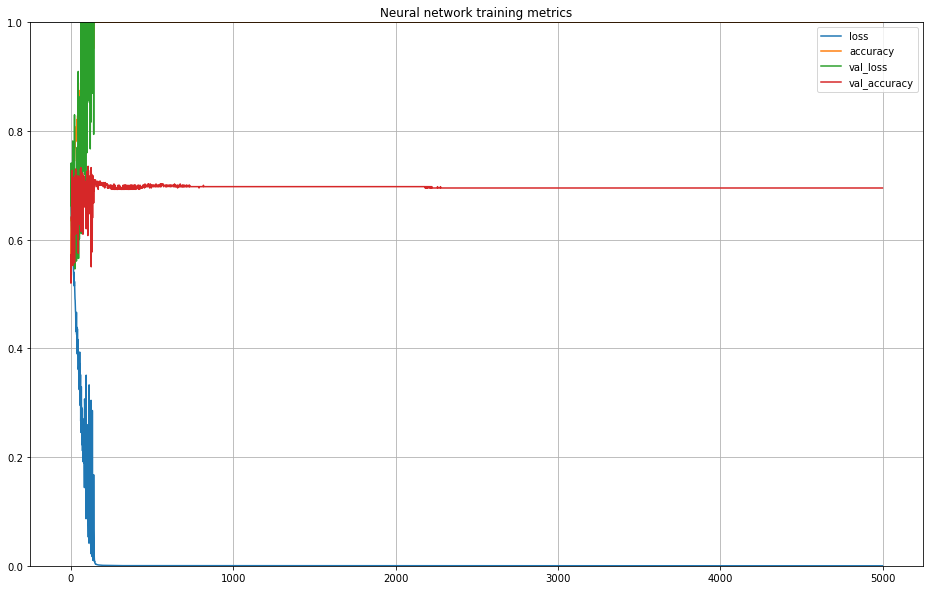

In [199]:
pd.DataFrame(history.history).plot(figsize = (16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Neural network training metrics")
plt.show()

> If the loss does not look like it has reached a minimum (being stable on the end), it suggests we can train the network further.

> It is normal that the accuracy for the training set is higher than for the validation set, but they might be close. If not, there is overfitting!

#### Confusion matrix

In [200]:
def confusionMatrix(labels, pred, y):
    
    confusionTFPN = {}
    confusionLabels = {}
    
    # Foreach emotion
    for ie in range(len(labels)):
        # TRUE AND FALSE POSITIVES AND NEGATIVES (TFPN)
        
        # Get indexes where emotion was predicted
        ieIndexesPred = [i for i in range(pred.size) if pred[i]==ie]
        ieIndexesNotPred = [i for i in range(pred.size) if pred[i]!=ie]

        # Predicted, and Actual
        TP = sum(pred[:,np.newaxis][ieIndexesPred]==y[ieIndexesPred])
        # Predicted, but not actual
        FP = sum(pred[:,np.newaxis][ieIndexesPred]!=y[ieIndexesPred])
        # Not predicted, but actual
        FN = sum(y[ieIndexesNotPred]==ie)
        # Not predicted and not actual
        TN = sum(y[ieIndexesNotPred]!=ie)

        TP = TP[0] if TP else 0
        FP = FP[0] if FP else 0
        FN = FN[0] if FN else 0
        TN = TN[0] if TN else 0
        
        confusionTFPN[labels[ie]] = {
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'TN': TN
        }
        
        # CONFUSION WITH OTHER labels (Confusion)
        # For emotion e
        # Count the number of predictions made for all classes
        # Foreach emotion, check how many times it has been predicted 
        
        # Get indexes where emotion is real
        ieIndexesY = [i for i in range(y.size) if y[i]==ie]
        
        # Foreach matching prediction, check what emotion was predicted
        confusionLabels[labels[ie]] = {
            e: sum(pred[:,np.newaxis][ieIndexesY]==labels.index(e))[0] for e in labels
        }
        
    return confusionTFPN, confusionLabels

In [201]:
def outputConfusionTables(labels, testExamplesNumber, confusionTFPN, confusionLabels, axs, axsLine, axsTitle):
     # TABLES
    rows = tuple(labels)
    
    # TABLES / TFPN
    # Output confusion matrix as plot table
    data = [
        [
            f"{vals['TP']} ({vals['TP']/testExamplesNumber*100:.2f}%)",
            f"{vals['TN']} ({vals['TN']/testExamplesNumber*100:.2f}%)",
            f"{vals['TP']+vals['TN']} ({(vals['TP']+vals['TN'])/testExamplesNumber*100:.2f}%)",
            f"{vals['FP']} ({vals['FP']/testExamplesNumber*100:.2f}%)",
            f"{vals['FN']} ({vals['FN']/testExamplesNumber*100:.2f}%)",
            f"{vals['FP']+vals['FN']} ({(vals['FP']+vals['FN'])/testExamplesNumber*100:.2f}%)",
            vals['FP']+vals['FN']+vals['TP']+vals['TN']
        ]
        for _, vals in confusionTFPN.items()
    ]
    columns = ['TP (%)', 'TN (%)', 'T (%)', 'FP (%)', 'FN (%)', 'F (%)', f"Total"]
    
    # Colorize cells depending on value
    cellColours=plt.cm.Blues([
        [
            vals['TP']/testExamplesNumber,
            vals['TN']/testExamplesNumber,
            0,
            vals['FP']/testExamplesNumber,
            vals['FN']/testExamplesNumber,
            0,
            0
        ]
        for _, vals in confusionTFPN.items()
    ])
        
    the_table = axs[axsLine].table(
      cellText=data,
      rowLabels=rows,
      colLabels=columns,
      loc='center',
      cellColours=cellColours
    )
    # the_table.scale(1.2, 1)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(20)
    axs[axsLine].axis('off')
    axs[axsLine].axis('tight')
    axs[axsLine].set_title(f"Confusion matrix {axsTitle}", fontsize=20, pad=0)    
    
    # TABLES / Confusion    
    # Output confusion matrix as plot table
    data = [[o for _,o in others.items()] for _,others in confusionLabels.items()]
    columns = rows
    
    # Colorize cells depending on value
    vals = [o for _,others in confusionLabels.items() for _,o in others.items()]
    normal = plt.Normalize(min(vals)-1, max(vals)+1)
    cellColours=plt.cm.Blues(normal(data))
        
    the_table = axs[axsLine+1].table(
      cellText=data,
      rowLabels=rows,
      colLabels=columns,
      loc='center',
      cellColours=cellColours
    )
    
    the_table.set_fontsize(20)
    # the_table.scale(1, 4)
    axs[axsLine+1].axis('off')
    axs[axsLine+1].axis('tight')
    axs[axsLine+1].set_title(f"True/Predicted {axsTitle}", fontsize=20)
    

In [202]:
# Get y predicted for test data set
predict = model.predict(X_test)
y_pred = np.array([np.argmax(p) for p in predict])

# Compute confusions
confusionTFPN, confusionLabels = confusionMatrix(labelNames, y_pred, y_test)

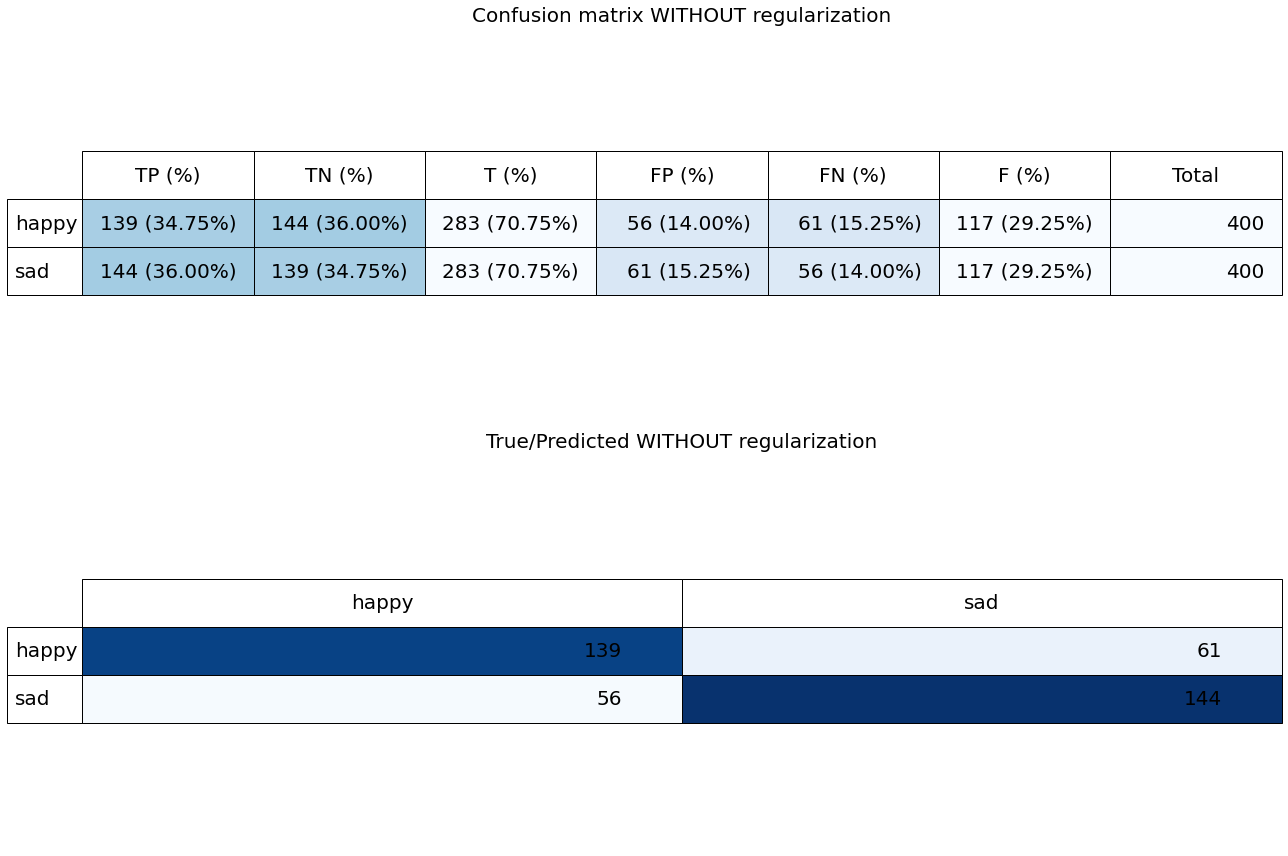

In [203]:
# Display as table
fig, axs = plt.subplots(2,1)

outputConfusionTables(labelNames, y_test.size, confusionTFPN, confusionLabels, axs, 0, "WITHOUT regularization")


fig.set_size_inches(18,6*len(labelNames))
fig.subplots_adjust(left=0.2, top=20)
fig.tight_layout()